# <center>**Projeto Integrador INSPER**</center>

**<center> Contextualização </center>**

O projeto integrador de 2023 consiste em construir um pipeline completo de pré-processamento de dados e construção de modelo preditivo de classificação, voltado para predizer se uma empresa irá deixar de operar em até dois anos.
    
Os dados foram coletados e curados pela Bisnode, uma empresa europeia do ramo de business information.

São dados entre os anos de 2005 e 2016, com empresas em alguns segmentos da economia (como produtos eletrônicos, equipamentos elétricos, motores, etc.) e serviços (alimentação, bebidas e hospedagem). Empresas que possuem receita acima de 100 milhões de Euro foram remotivdas para fins de mininizar as possibilidades de identificação.

### **Bibliotecas e Ajustes**

Importando todas as bibliotecas utilizadas no projeto e ajustes de configuração de display do jupyter notebook.

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import missingno as msno
from random import choice
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Ajustando configurações de display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## <center> Pré Processamento </center>

Importando arquivo para um data frame com pandas.

In [2]:
# Criando df_bisnode a parir de arquivo csv
df_bisnode = pd.read_csv("cs_bisnode_panel.csv")

df_bisnode

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,finished_prod,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,net_dom_sales,net_exp_sales,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,wages,D,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.00,2005-01-01,2005-12-31,NaN,692.59,7266.67,7574.07,0.00,0.00,0.00,NaN,1229.63,218.52,0.00,4355.56,2911.11,38222.22,NaN,NaN,22222.22,62.96,62751.85,881.48,1388.89,1229.63,NaN,NaN,0,364,0,2005,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN
1,1001034.00,2006-01-01,2006-12-31,NaN,603.70,13122.22,12211.11,0.00,0.00,0.00,NaN,725.93,996.30,0.00,7225.93,5896.30,38140.74,NaN,NaN,23844.45,755.56,64625.93,1637.04,1388.89,725.93,NaN,NaN,0,364,0,2006,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN
2,1001034.00,2007-01-01,2007-12-31,NaN,425.93,8196.30,7800.00,0.00,0.00,0.00,NaN,1322.22,570.37,0.00,7951.85,177.78,40174.07,NaN,NaN,22262.96,0.00,65100.00,1633.33,1388.89,1322.22,NaN,NaN,0,364,0,2007,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN
3,1001034.00,2008-01-01,2008-12-31,NaN,300.00,8485.19,7781.48,0.00,0.00,0.00,NaN,1022.22,714.81,0.00,5233.33,1392.59,54274.07,NaN,NaN,21107.41,0.00,78085.19,1725.93,1481.48,1022.22,NaN,NaN,0,365,0,2008,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN
4,1001034.00,2009-01-01,2009-12-31,NaN,207.41,5137.04,15300.00,0.00,0.00,0.00,NaN,814.81,-11044.44,0.00,3259.26,11.11,41755.55,NaN,NaN,13237.04,-11074.07,45388.89,-9348.15,1481.48,814.81,NaN,NaN,0,364,0,2009,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,464120938496.00,2011-01-01,2011-12-31,NaN,0.00,1807.41,3.70,0.00,0.00,0.00,NaN,0.00,25.93,0.00,0.00,1807.41,37.04,NaN,NaN,225.93,22.22,288.89,1803.70,1111.11,0.00,NaN,NaN,0,364,0,2011,1990.00,NaN,1.00,0.00,1.00,NaN,8187.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN
287825,464120938496.00,2012-01-01,2012-12-31,NaN,0.00,1518.52,96.30,0.00,0.00,0.00,NaN,0.00,-381.48,0.00,0.00,1518.52,96.30,NaN,NaN,285.19,-381.48,0.00,1422.22,1111.11,0.00,NaN,NaN,0,365,0,2012,1990.00,NaN,1.00,0.00,1.00,NaN,8187.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN
287826,464120938496.00,2013-01-01,2013-12-31,NaN,0.00,988.89,77.78,0.00,0.00,0.00,NaN,0.00,-511.11,0.00,0.00,966.67,207.41,NaN,NaN,296.30,-511.11,0.00,911.11,1111.11,0.00,NaN,NaN,0,364,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN
287827,464120938496.00,2014-01-01,2014-12-31,NaN,0.00,644.44,233.33,0.00,0.00,0.00,NaN,0.00,-500.00,0.00,0.00,618.52,200.00,NaN,NaN,303.70,-500.00,0.00,411.11,1111.11,0.00,NaN,NaN,0,364,0,2014,1990.00,NaN,1.00,0.00,1.00,1942.00,1441.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN


In [3]:
# Principais informações
df_bisnode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287829 entries, 0 to 287828
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   comp_id               287829 non-null  float64
 1   begin                 287829 non-null  object 
 2   end                   287829 non-null  object 
 3   COGS                  18257 non-null   float64
 4   amort                 279789 non-null  float64
 5   curr_assets           287698 non-null  float64
 6   curr_liab             287698 non-null  float64
 7   extra_exp             269300 non-null  float64
 8   extra_inc             269300 non-null  float64
 9   extra_profit_loss     270626 non-null  float64
 10  finished_prod         17485 non-null   float64
 11  fixed_assets          287698 non-null  float64
 12  inc_bef_tax           280392 non-null  float64
 13  intang_assets         287689 non-null  float64
 14  inventories           287698 non-null  float64
 15  

### **Requisitos**

Requisitos descritos no pdf do projeto integrador.

- `Remover as colunas: ['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D'], pois elas apresentam um percentual considerável de missing data`

In [4]:
# Criando função que retorna o percentual de missing data do dataframe

def missing_data_df(df):
    """
    Função que retorna o percentual de dados faltantes de um dataframe
    """
    # Contando o numero de linhas sem dado
    missing_count = df.isnull().sum()

    # Calculando o percentual com base no numero total de linhas do dataframe
    missing_percentage = (missing_count / len(df))*100

    missing_percentage = missing_percentage.sort_values(ascending=False)

    return missing_percentage


# Executando função para o dataframe
missing_data_df(df_bisnode).head(10)

D               100.00
finished_prod    93.93
wages            93.75
COGS             93.66
net_exp_sales    93.66
net_dom_sales    93.66
exit_year        86.50
exit_date        80.48
labor_avg        50.91
birth_year       38.85
dtype: float64

In [5]:
# Retirando colunas

df_bisnode = df_bisnode.drop(columns=['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D'], axis=1)

# Visualizando alterações

missing_data_df(df_bisnode).head(10)

exit_year      86.50
exit_date      80.48
labor_avg      50.91
birth_year     38.85
founded_year   19.61
gender         19.60
origin         19.60
female         19.60
foreign        19.60
ceo_count      19.60
dtype: float64

Observando os valores faltantes com a biblioteca missigno:

<AxesSubplot: >

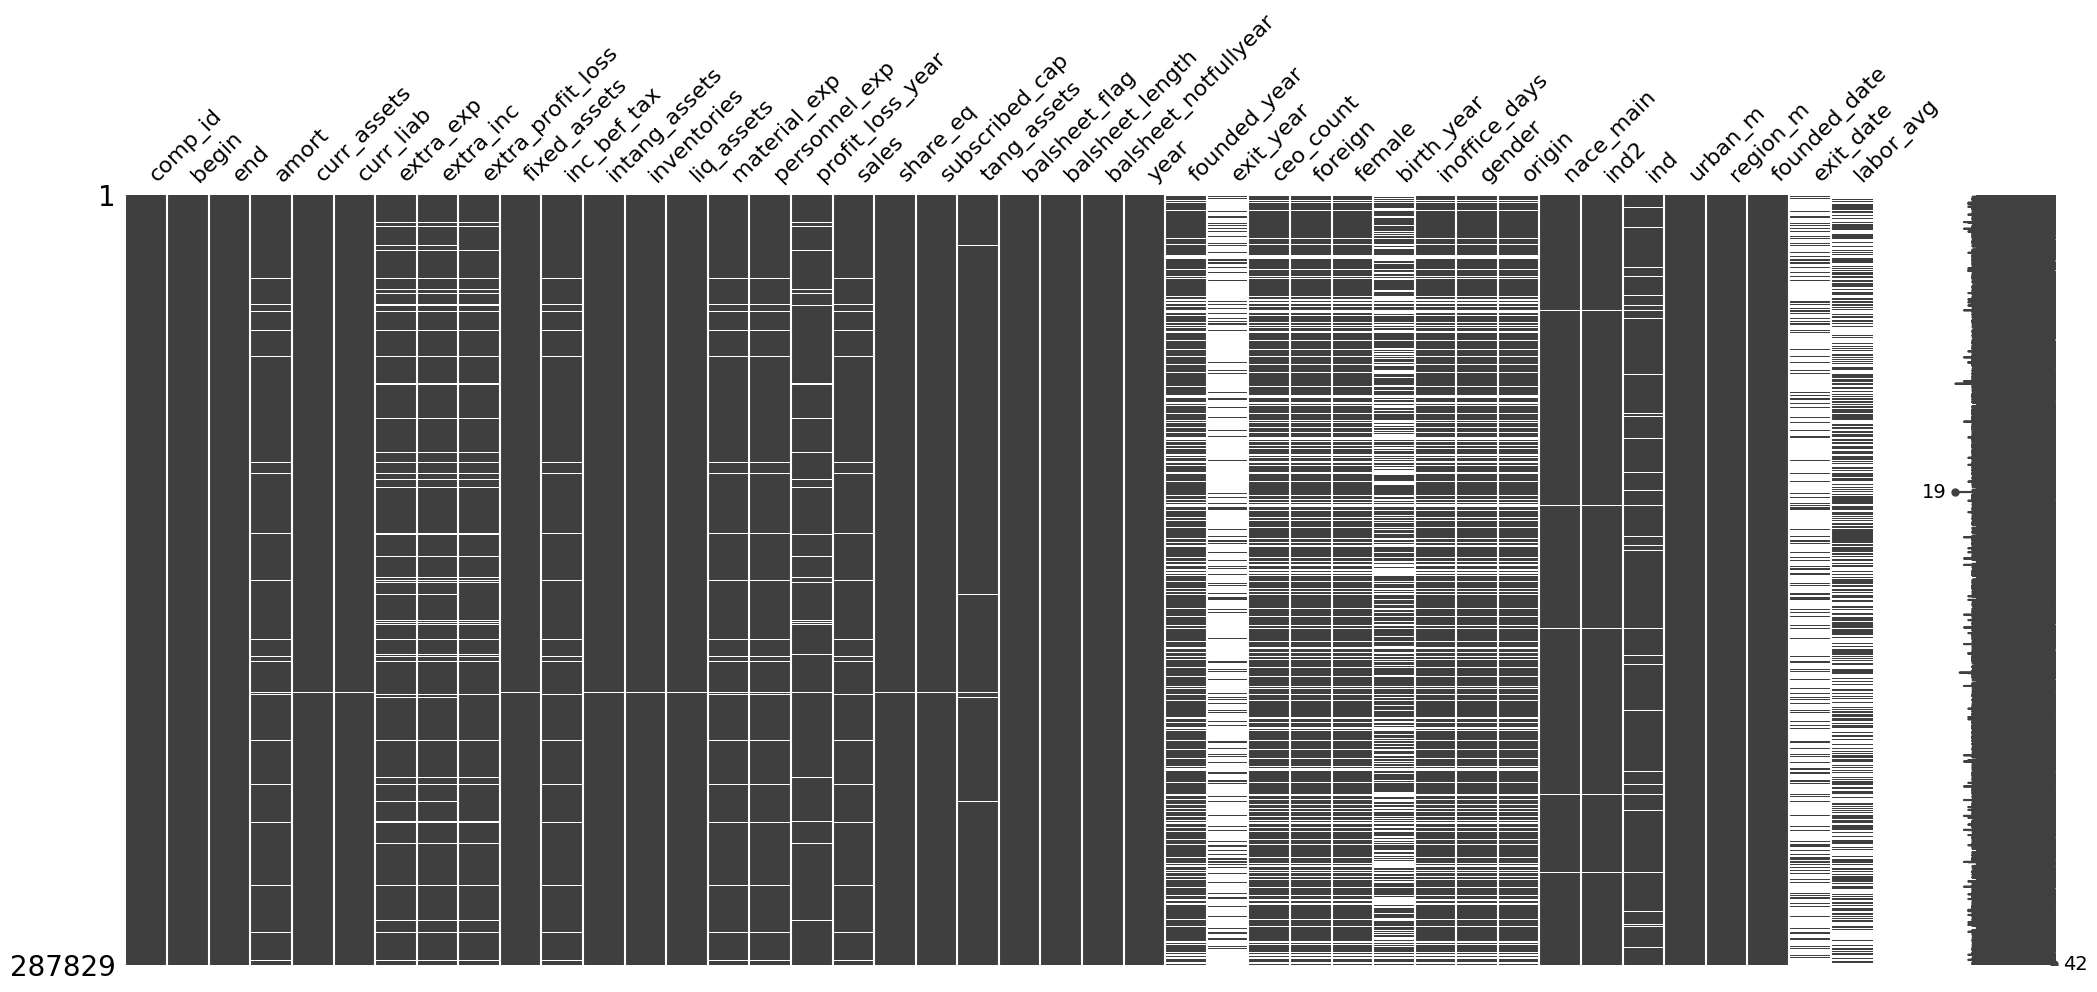

In [6]:
# Visualizando Valores Faltantes com a Biblioteca missigno

msno.matrix(df_bisnode)

Como pode ser observado, ainda existem colunas com um alto percentual de missing values.

- `Remova de seus dados os registros do ano de 2016` 

In [7]:
# Removendo linhas com registro de 2016
df_bisnode = df_bisnode[df_bisnode['year'] != 2016]

- `Será preciso criar uma coluna da variável dependente que será objeto da predição.
Para isso, use o conceito de que uma empresa deixou de operar se ela esteve ativa no
ano X, mas não apresentou vendas em X + 2 anos.`

Inicialmente, se o campo "sales" da empresa estiver nulo, assumiremos que a venda para esse ano foi zero, a fim de simplificar o cálculo da variável target.

In [8]:
# Verificando o numero de linhas com sales nulos
print(f"Numero de linhas com valores nulos: {df_bisnode[df_bisnode['sales'].isna()].shape[0]}")

# Realizando o tratamento
df_bisnode.loc[df_bisnode['sales'].isna(), "sales"] = 0

# Verificando mudanças
print(f"Numero de linhas com valores nulos após tratamento: {df_bisnode[df_bisnode['sales'].isna()].shape[0]}")

Numero de linhas com valores nulos: 7437
Numero de linhas com valores nulos após tratamento: 0


Calculando as empresas inativas com base na lógica proposta. Desenvolveu-se uma função que analisa as "sales" (vendas) dos dois anos subsequentes. Se a soma destas vendas for zero, a empresa é classificada como inativa (1) naquele ano. Caso contrário, ela é considerada ativa (0). Esse resultado é registrado em uma nova coluna denominada "target".

In [9]:
def target(df, demo = False):
    # Criando um dataframe de processamento apenas com as colunas necessarias
    df_process = df[["comp_id", "year", "sales"]].copy()

    # Criando coluna com sales do ano X + 1
    df_process["sales_X_1"] = df_process["sales"].shift(-1)

    # Criando coluna com sales do ano X + 2
    df_process["sales_X_2"] = df_process["sales"].shift(-2)

    # Soma de sales dos dois anos
    df_process["soma_sales"] = df_process["sales_X_1"] + df_process["sales_X_2"]

    # Computando a variavel target.
    df_process["target"] = df_process["soma_sales"].apply(lambda x: 1 if (x <= 0) else 0)

    # Corrigindo os anos de 2014 e 2015 que não possuem dados suficientes para classificação
    df_process.loc[(df_process["year"] == 2014) | (df_process["year"] == 2015), "target"] = np.nan

    # Criando df_demonstração para demonstrar a logica da função
    df_demonstracao = df_process.copy()
    if demo:
        return df_demonstracao

    # Criando df_final com a variavel target computada
    df_final = df
    df_final['target'] = df_process['target']


    return(df_final)

# Aplicando função no df_bisnode
df_bisnode = target(df_bisnode)

df_bisnode

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,target
0,1001034.00,2005-01-01,2005-12-31,692.59,7266.67,7574.07,0.00,0.00,0.00,1229.63,218.52,0.00,4355.56,2911.11,38222.22,22222.22,62.96,62751.85,881.48,1388.89,1229.63,0,364,0,2005,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN,0.00
1,1001034.00,2006-01-01,2006-12-31,603.70,13122.22,12211.11,0.00,0.00,0.00,725.93,996.30,0.00,7225.93,5896.30,38140.74,23844.45,755.56,64625.93,1637.04,1388.89,725.93,0,364,0,2006,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN,0.00
2,1001034.00,2007-01-01,2007-12-31,425.93,8196.30,7800.00,0.00,0.00,0.00,1322.22,570.37,0.00,7951.85,177.78,40174.07,22262.96,0.00,65100.00,1633.33,1388.89,1322.22,0,364,0,2007,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN,0.00
3,1001034.00,2008-01-01,2008-12-31,300.00,8485.19,7781.48,0.00,0.00,0.00,1022.22,714.81,0.00,5233.33,1392.59,54274.07,21107.41,0.00,78085.19,1725.93,1481.48,1022.22,0,365,0,2008,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN,0.00
4,1001034.00,2009-01-01,2009-12-31,207.41,5137.04,15300.00,0.00,0.00,0.00,814.81,-11044.44,0.00,3259.26,11.11,41755.55,13237.04,-11074.07,45388.89,-9348.15,1481.48,814.81,0,364,0,2009,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,0.08,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,464120938496.00,2011-01-01,2011-12-31,0.00,1807.41,3.70,0.00,0.00,0.00,0.00,25.93,0.00,0.00,1807.41,37.04,225.93,22.22,288.89,1803.70,1111.11,0.00,0,364,0,2011,1990.00,NaN,1.00,0.00,1.00,NaN,8187.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN,1.00
287825,464120938496.00,2012-01-01,2012-12-31,0.00,1518.52,96.30,0.00,0.00,0.00,0.00,-381.48,0.00,0.00,1518.52,96.30,285.19,-381.48,0.00,1422.22,1111.11,0.00,0,365,0,2012,1990.00,NaN,1.00,0.00,1.00,NaN,8187.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN,1.00
287826,464120938496.00,2013-01-01,2013-12-31,0.00,988.89,77.78,0.00,0.00,0.00,0.00,-511.11,0.00,0.00,966.67,207.41,296.30,-511.11,0.00,911.11,1111.11,0.00,0,364,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN,1.00
287827,464120938496.00,2014-01-01,2014-12-31,0.00,644.44,233.33,0.00,0.00,0.00,0.00,-500.00,0.00,0.00,618.52,200.00,303.70,-500.00,0.00,411.11,1111.11,0.00,0,364,0,2014,1990.00,NaN,1.00,0.00,1.00,1942.00,1441.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN,NaN


Para uma melhor compreensão da lógica por trás da função, a seguir está apresentado o dataframe auxiliar utilizado nos cálculos.

In [10]:
# Printando o df_process auxiliar
df_demonstracao = target(df_bisnode, demo=True)

df_demonstracao[df_demonstracao['comp_id'] == 1001034.00]

,comp_id,year,sales,sales_X_1,sales_X_2,soma_sales,target
0,1001034.00,2005,62751.85,64625.93,65100.00,129725.93,0.00
1,1001034.00,2006,64625.93,65100.00,78085.19,143185.19,0.00
2,1001034.00,2007,65100.00,78085.19,45388.89,123474.08,0.00
3,1001034.00,2008,78085.19,45388.89,9929.63,55318.52,0.00
4,1001034.00,2009,45388.89,9929.63,0.00,9929.63,0.00
5,1001034.00,2010,9929.63,0.00,0.00,0.00,1.00
6,1001034.00,2011,0.00,0.00,0.00,0.00,1.00
7,1001034.00,2012,0.00,0.00,0.00,0.00,1.00
8,1001034.00,2013,0.00,0.00,0.00,0.00,1.00
9,1001034.00,2014,0.00,0.00,925.93,925.93,NaN


Ao usar a função shift(), as colunas "sales_X_1" e "sales_X_2" capturam os valores de vendas dos dois anos subsequentes, enquanto a coluna "soma_sales" registra a soma desses valores. Se a soma das vendas desses dois anos for zero, a variável "target" é atribuída ao valor binário 1; caso contrário, ela recebe 0. Vale ressaltar que essa função não é aplicável a partir de 2014, pois os dados disponíveis se estendem até 2015. Portanto, não temos informações suficientes para classificar os anos subsequentes. Como os dados serão filtrados para o ano de 2012, este erro não impactará o modelo.

In [11]:
df_bisnode[df_bisnode['comp_id'] == 2007586]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,target
405,2007586.00,2005-01-01,2005-12-31,0.00,825.93,214.81,0.00,0.00,0.00,0.00,488.89,0.00,0.00,814.81,818.52,0.00,411.11,1322.22,611.11,185.19,0.00,0,364,0,2005,1999.00,NaN,1.00,0.00,1.00,1964.00,6359.00,female,Domestic,5610.00,56.00,3.00,3,East,1999-07-28,NaN,NaN,0.00
406,2007586.00,2006-01-01,2006-12-31,185.19,1151.85,140.74,0.00,2370.37,2370.37,0.00,481.48,0.00,885.19,262.96,4359.26,1711.11,396.30,4392.59,1011.11,185.19,0.00,0,364,0,2006,1999.00,NaN,1.00,0.00,1.00,1964.00,6359.00,female,Domestic,5610.00,56.00,3.00,3,East,1999-07-28,NaN,NaN,0.00
407,2007586.00,2007-01-01,2007-12-31,0.00,511.11,1381.48,0.00,0.00,0.00,0.00,-1881.48,0.00,0.00,403.70,4018.52,2859.26,-1881.48,5048.15,-870.37,185.19,0.00,0,364,0,2007,1999.00,NaN,1.00,0.00,1.00,1964.00,6359.00,female,Domestic,5610.00,56.00,3.00,3,East,1999-07-28,NaN,NaN,0.00
408,2007586.00,2008-01-01,2008-12-31,0.00,733.33,3329.63,0.00,0.00,0.00,0.00,-1718.52,0.00,0.00,455.56,6903.70,3044.44,-1725.93,8281.48,-2596.30,185.19,0.00,0,365,0,2008,1999.00,NaN,1.00,0.00,1.00,1964.00,6359.00,female,Domestic,5610.00,56.00,3.00,3,East,1999-07-28,NaN,NaN,0.00
409,2007586.00,2009-01-01,2009-12-31,0.00,618.52,4896.30,0.00,0.00,0.00,0.00,-1666.67,0.00,0.00,488.89,6629.63,4714.81,-1681.48,9755.56,-4277.78,185.19,0.00,0,364,0,2009,1999.00,NaN,1.00,0.00,1.00,1964.00,6359.00,female,Domestic,5610.00,56.00,3.00,3,East,1999-07-28,NaN,0.08,0.00
410,2007586.00,2010-01-01,2010-12-31,0.00,1237.04,1518.52,0.00,0.00,0.00,0.00,-955.56,0.00,0.00,1144.44,4781.48,5048.15,-966.67,8966.67,-281.48,185.19,0.00,0,364,0,2010,1999.00,NaN,1.00,0.00,1.00,1964.00,6359.00,female,Domestic,5610.00,56.00,3.00,3,East,1999-07-28,NaN,0.08,0.00
411,2007586.00,2011-01-01,2011-12-31,0.00,1381.48,1529.63,0.00,0.00,0.00,0.00,148.15,0.00,907.41,355.56,7388.89,4129.63,133.33,11766.67,-148.15,185.19,0.00,0,364,0,2011,1999.00,NaN,1.00,0.00,1.00,1964.00,6359.00,female,Domestic,5610.00,56.00,3.00,3,East,1999-07-28,NaN,0.08,0.00
412,2007586.00,2012-01-01,2012-12-31,0.00,3170.37,711.11,0.00,0.00,0.00,0.00,2781.48,0.00,1937.04,1207.41,5177.78,5300.00,2603.70,13807.41,2459.26,185.19,0.00,0,365,0,2012,1999.00,NaN,1.00,0.00,1.00,1964.00,6359.00,female,Domestic,5610.00,56.00,3.00,3,East,1999-07-28,NaN,0.08,0.00
413,2007586.00,2013-01-01,2013-12-31,0.00,3437.04,733.33,0.00,0.00,0.00,0.00,274.07,0.00,2337.04,1025.93,8800.00,7737.04,244.44,17007.41,2703.70,185.19,0.00,0,364,0,2013,1999.00,NaN,1.00,0.00,1.00,1964.00,6359.00,female,Domestic,5610.00,56.00,3.00,3,East,1999-07-28,NaN,0.08,0.00


Além de considerar a coluna de vendas, o grupo também classificou como inativas as empresas que não apresentam dados completos até 2014. A seguir, apresentamos as modificações realizadas.

In [12]:
# Criando um dataframe auxiliar
df_chave = df_bisnode[["comp_id", "year"]].groupby("comp_id").max()

# Lista das empresas que devem estar inativas
lista_comp_id_inativas = df_chave[df_chave['year'] < 2014].index.to_list()

# Aplicando a correção necessaria
df_bisnode.loc[df_bisnode['year'] == 2012, "target"] = df_bisnode.apply(lambda x: 1 if x['comp_id'] in lista_comp_id_inativas else x['target'], axis=1)

In [13]:
# Conferindo os resultados
df_bisnode.loc[df_bisnode["comp_id"] == 2007586, ["comp_id", "year","sales", "target"]]

,comp_id,year,sales,target
405,2007586.00,2005,1322.22,0.00
406,2007586.00,2006,4392.59,0.00
407,2007586.00,2007,5048.15,0.00
408,2007586.00,2008,8281.48,0.00
409,2007586.00,2009,9755.56,0.00
410,2007586.00,2010,8966.67,0.00
411,2007586.00,2011,11766.67,0.00
412,2007586.00,2012,13807.41,1.00
413,2007586.00,2013,17007.41,0.00


- `Filtre para trabalhar apenas com empresas do ano de 2012`

In [14]:
# Criando novo dataframe com dados filtrados para o ano de 2012
df_bisnode_2012 = df_bisnode[df_bisnode['year'] == 2012]

df_bisnode_2012.head(10)

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,target
7,1001034.00,2012-01-01,2012-12-31,140.74,148.15,21429.63,0.00,0.00,0.00,340.74,-2474.07,0.00,0.00,25.93,1862.96,285.19,-2474.07,0.00,-20940.74,1481.48,340.74,0,365,0,2012,1990.00,NaN,2.00,0.00,0.50,1954.00,4895.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,0.08,1.00
14,1001541.00,2012-01-01,2012-12-31,481.48,9629.63,1303.70,0.00,0.00,0.00,190566.67,-7696.30,0.00,0.00,9048.15,8351.85,0.00,-7722.22,1203.70,191262.97,200740.73,190566.67,0,365,0,2012,2008.00,NaN,1.00,0.00,0.00,1974.00,3222.00,male,Domestic,5610.00,56.00,3.00,3,Central,2008-02-24,NaN,NaN,0.00
23,1002029.00,2012-01-01,2012-12-31,14929.63,203885.19,120444.45,0.00,0.00,0.00,23459.26,11818.52,0.00,677.78,15077.78,984270.38,41037.04,9722.22,1136514.88,93144.45,11111.11,23459.26,0,365,0,2012,2006.00,NaN,2.00,0.00,0.00,1975.00,3101.00,male,Domestic,2711.00,27.00,2.00,3,East,2006-07-03,NaN,0.46,0.00
35,1003200.00,2012-01-01,2012-12-31,25.93,22.22,10996.30,0.00,0.00,0.00,0.00,-2337.04,0.00,0.00,22.22,1933.33,1355.56,-2340.74,2785.19,-23785.19,1851.85,0.00,0,365,0,2012,2003.00,2014.00,2.00,0.00,1.00,NaN,1754.00,female,Domestic,5630.00,56.00,3.00,1,Central,2003-10-21,2014-08-09,NaN,1.00
48,1007261.00,2012-01-01,2012-12-31,0.00,255.56,9207.41,0.00,0.00,0.00,0.00,-4670.37,0.00,0.00,255.56,0.00,4670.37,-4670.37,0.00,-8951.85,1851.85,0.00,0,365,0,2012,2010.00,2015.00,1.00,0.00,0.00,1962.00,1539.00,male,Domestic,5610.00,56.00,3.00,1,Central,2010-08-26,2015-11-19,0.08,1.00
56,1011889.00,2012-01-01,2012-12-31,36625.93,160166.67,18911.11,0.00,0.00,0.00,933574.06,96751.85,1537.04,11866.67,131766.67,204659.27,92614.81,96751.85,433666.66,1071011.12,17481.48,932037.06,0,365,0,2012,1992.00,NaN,1.00,0.00,0.00,1946.00,6198.00,male,Domestic,5510.00,55.00,3.00,2,West,1992-11-09,NaN,1.62,0.00
68,1014183.00,2012-01-01,2012-12-31,12551.85,199903.70,8274.07,0.00,7.41,7.41,118229.63,-1429.63,0.00,0.00,18585.19,66744.45,55711.11,-2351.85,129729.63,309885.19,11111.11,118229.63,0,365,0,2012,2001.00,NaN,1.00,0.00,0.00,1946.00,3594.00,male,Domestic,5510.00,55.00,3.00,2,Central,2001-12-21,NaN,0.72,0.00
80,1018301.00,2012-01-01,2012-12-31,0.00,1811.11,592.59,0.00,11.11,11.11,52155.55,-1096.30,118.52,496.30,1314.81,3325.93,3407.41,-1107.41,6722.22,10781.48,11111.11,52037.04,0,365,0,2012,2004.00,NaN,2.00,0.00,0.50,1961.50,1246.50,mix,Domestic,5630.00,56.00,3.00,2,Central,2004-06-29,NaN,0.15,0.00
91,1022796.00,2012-01-01,2012-12-31,688.89,6166.67,6792.59,0.00,0.00,0.00,5133.33,-1262.96,0.00,555.56,3133.33,17629.63,8070.37,-1311.11,26096.30,3718.52,3703.70,5133.33,0,365,0,2012,2001.00,2016.00,1.00,0.00,0.00,1969.00,5201.00,male,Domestic,5630.00,56.00,3.00,1,Central,2001-02-01,2016-06-06,0.08,0.00
102,1035705.00,2012-01-01,2012-12-31,251.85,3355.56,3059.26,0.00,0.00,0.00,0.00,-7992.59,0.00,2796.30,262.96,24588.89,7411.11,-8000.00,24025.93,296.30,11111.11,0.00,0,365,0,2012,2011.00,NaN,2.00,0.50,0.00,1973.00,1040.00,male,mix,5630.00,56.00,3.00,2,East,2011-10-26,NaN,0.10,0.00


- `Agora é o momento de olhar por inconsistências nos dados. Por exemplo, veja a coluna Sales . Há volumes de venda negativos, isso não faz sentido!`

`Aproveite para usar np.where para ajustar isso. De modo que onde Sales < 0 você já pode substituir por 0`

In [15]:
# Verificando valores negativos da coluna sales
df_bisnode_2012[df_bisnode_2012['sales'] < 0]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,target
83943,39040622592.00,2012-01-01,2012-12-31,0.00,7607.41,44.44,0.00,0.00,0.00,0.00,-3540.74,0.00,0.00,6025.93,677.78,1244.44,-3548.15,-1607.41,7562.96,11111.11,0.00,0,365,0,2012,2001.00,NaN,1.00,0.00,1.00,1969.00,2638.00,female,Domestic,3320.00,33.00,2.00,1,Central,2001-10-26,NaN,NaN,0.00
181131,182804217856.00,2012-01-01,2012-12-31,0.00,9225.93,22381.48,0.00,0.00,0.00,0.00,-5266.67,0.00,7114.81,51.85,-5266.67,0.00,-5266.67,-5266.67,-13155.56,1851.85,0.00,0,365,0,2012,2011.00,2016.00,1.00,0.00,1.00,NaN,1231.00,female,Domestic,5610.00,56.00,3.00,3,East,2011-02-20,2016-04-19,0.17,1.00
224777,281625395200.00,2012-01-01,2012-12-31,0.00,7322.22,84888.89,0.00,0.00,0.00,2288.89,-18344.45,0.00,6492.59,0.00,0.00,0.00,-18370.37,-18344.45,-76070.37,11111.11,2288.89,0,365,0,2012,2006.00,NaN,1.00,0.00,0.00,1971.00,3762.00,male,Domestic,5610.00,56.00,3.00,1,Central,2006-08-10,NaN,0.23,0.00
278455,433430626304.00,2012-01-01,2012-11-18,0.00,40637.04,0.00,0.00,0.00,0.00,0.00,-4222.22,0.00,0.00,0.00,37266.67,6040.74,-4222.22,-888.89,40637.04,40740.74,0.00,0,322,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2611.00,26.00,2.00,3,East,2003-12-07,2013-02-20,0.35,1.00


In [16]:
# Tratando valores negativos
df_bisnode_2012['sales'] = np.where(df_bisnode_2012['sales'] < 0, 0, df_bisnode_2012['sales'])

print("Número de valores negativos na coluna sales:")
df_bisnode_2012.loc[df_bisnode_2012['sales'] < 0].shape[0]

Número de valores negativos na coluna sales:


C:\Users\GBinfo\AppData\Local\Temp\ipykernel_20364\3206351240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisnode_2012['sales'] = np.where(df_bisnode_2012['sales'] < 0, 0, df_bisnode_2012['sales'])


0

- `Essa variável é bastante assimétrica, concorda? Será que vale criar novas colunas que representem o valor em log dessa coluna?`

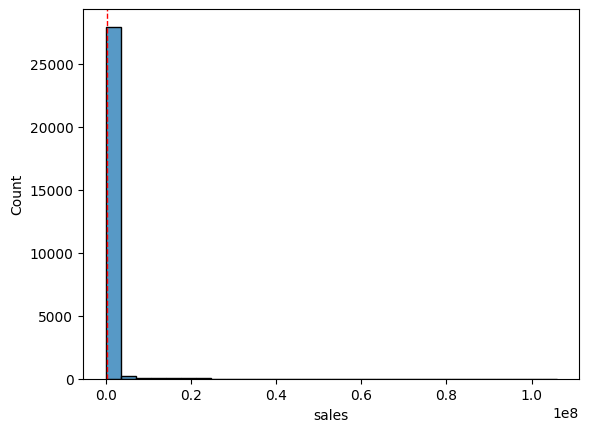

In [17]:
# Histograma da coluna sales
sns.histplot(df_bisnode_2012['sales'], bins=30)

# Plotando a média
plt.axvline(df_bisnode_2012["sales"].mean(), color='red', linestyle='dashed', linewidth=1)


plt.show()

In [18]:
# Estatistica descritiva para coluna sales
df_bisnode_2012['sales'].describe()

count       28469.00
mean       420748.94
std       3468725.70
min             0.00
25%          1851.85
50%         22644.45
75%         91848.15
max     105866208.00
Name: sales, dtype: float64

Nota-se que, claramente, existem valores atípicos que estão causando uma assimetria na distribuição. Após realizar analisar as estastiscas descritivas, fica evidente que a maior parte dos dados se encontra no intervalo entre 1851,85(Q1) e 91.848,15(Q3). No entanto, o valor máximo está substancialmente acima desse range, puxando a média para a direita e elevando o desvio padrão.

Além destas caracteristicas, podemos tentar estimar a assimetria de uma distribuição em termos númericos utilizando uma função chamada skew(), que utiliza a seguinte formula:

$$skew() = \frac{n}{(n-1)(n-2)}\sum_{i=1}^{n}(\frac{x_{i}-\bar{x}}{S})^{3}$$

No qual:
- $n$ é o número de observações
- $x_i$ é o valor da i-ésima observação
- $\bar{x}$ é a média
- $S$ no denominador do somatório é o desvio padrão da amostra

Distribuições normais se aproximam de zero, enquanto que valores positivos indicam uma distribuição mais esticada para a direita, equanto que uma negativa indica uma distribuição para esquerda. Valores muito alto, demonstro que a assimetria está alta.

Se skew() = 0, a distribuição é perfeitamente simétrica.

Se skew() > 0, a distribuição tem uma cauda direita mais longa.

Se skew() < 0, a distribuição tem uma cauda esquerda mais longa.

In [19]:
# Cálculando a assimetria com a função skew() para coluna sales

df_bisnode_2012['sales'].skew()

18.02054782404921

Um valor positivo, como 18.02, indica uma assimetria positiva. Isso significa que a cauda da distribuição está esticada mais para a direita. Em termos práticos, isso demonstra que pode haver um número muito grande de valores abaixo da média e alguns valores extremamente altos que estão puxando a média para cima.

Por conta disso, iremos utilizar a escala logaritimica para tentar melhorar esta distribuição.

In [20]:
# Aplicando escala logaritimica na coluna sales

# Aplicando log
df_bisnode_2012['sales'] = df_bisnode_2012['sales'].apply(lambda x: np.log(x) if x > 0 else 0)

df_bisnode_2012.head()

C:\Users\GBinfo\AppData\Local\Temp\ipykernel_20364\3338379699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisnode_2012['sales'] = df_bisnode_2012['sales'].apply(lambda x: np.log(x) if x > 0 else 0)


,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,target
7,1001034.00,2012-01-01,2012-12-31,140.74,148.15,21429.63,0.00,0.00,0.00,340.74,-2474.07,0.00,0.00,25.93,1862.96,285.19,-2474.07,0.00,-20940.74,1481.48,340.74,0,365,0,2012,1990.00,NaN,2.00,0.00,0.50,1954.00,4895.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,0.08,1.00
14,1001541.00,2012-01-01,2012-12-31,481.48,9629.63,1303.70,0.00,0.00,0.00,190566.67,-7696.30,0.00,0.00,9048.15,8351.85,0.00,-7722.22,7.09,191262.97,200740.73,190566.67,0,365,0,2012,2008.00,NaN,1.00,0.00,0.00,1974.00,3222.00,male,Domestic,5610.00,56.00,3.00,3,Central,2008-02-24,NaN,NaN,0.00
23,1002029.00,2012-01-01,2012-12-31,14929.63,203885.19,120444.45,0.00,0.00,0.00,23459.26,11818.52,0.00,677.78,15077.78,984270.38,41037.04,9722.22,13.94,93144.45,11111.11,23459.26,0,365,0,2012,2006.00,NaN,2.00,0.00,0.00,1975.00,3101.00,male,Domestic,2711.00,27.00,2.00,3,East,2006-07-03,NaN,0.46,0.00
35,1003200.00,2012-01-01,2012-12-31,25.93,22.22,10996.30,0.00,0.00,0.00,0.00,-2337.04,0.00,0.00,22.22,1933.33,1355.56,-2340.74,7.93,-23785.19,1851.85,0.00,0,365,0,2012,2003.00,2014.00,2.00,0.00,1.00,NaN,1754.00,female,Domestic,5630.00,56.00,3.00,1,Central,2003-10-21,2014-08-09,NaN,1.00
48,1007261.00,2012-01-01,2012-12-31,0.00,255.56,9207.41,0.00,0.00,0.00,0.00,-4670.37,0.00,0.00,255.56,0.00,4670.37,-4670.37,0.00,-8951.85,1851.85,0.00,0,365,0,2012,2010.00,2015.00,1.00,0.00,0.00,1962.00,1539.00,male,Domestic,5610.00,56.00,3.00,1,Central,2010-08-26,2015-11-19,0.08,1.00


Como não existe log de zero, a seguinte expressão foi aplicada na coluna sales:


$$ \text{sales\_log}(x) = 
\begin{cases} 
\log(x) & \text{se } x > 0 \\
0 & \text{se } x \leq 0 
\end{cases} $$

Conferindo se a distribuição se tornou normal.

In [21]:
# Cálculando o skew()
df_bisnode_2012['sales'].skew()

-0.9536665381892234

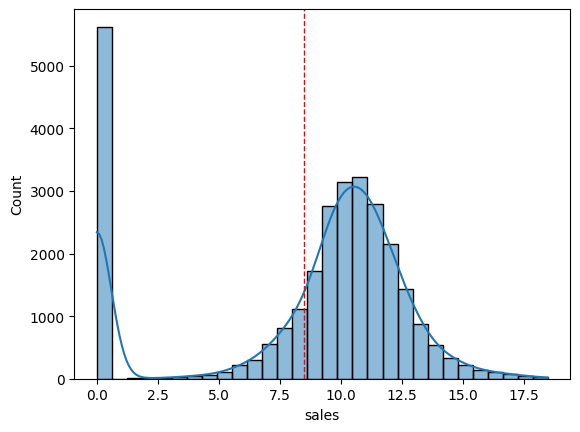

In [22]:
# Histograma da coluna sales

sns.histplot(df_bisnode_2012['sales'], bins=30, kde=True)
plt.axvline(df_bisnode_2012["sales"].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

Agora temos uma coluna de sales muito mais proxima de uma distribuição normal do que antes.Aparentemente,apenas os valores iguais a zero estão distorcendo a distribuição.

In [23]:
# Cálculando skew() para coluna sales sem os valores iguais a zero

df_bisnode_2012.loc[df_bisnode_2012['sales'] > 0, "sales"].skew()

-0.0073173576643085205

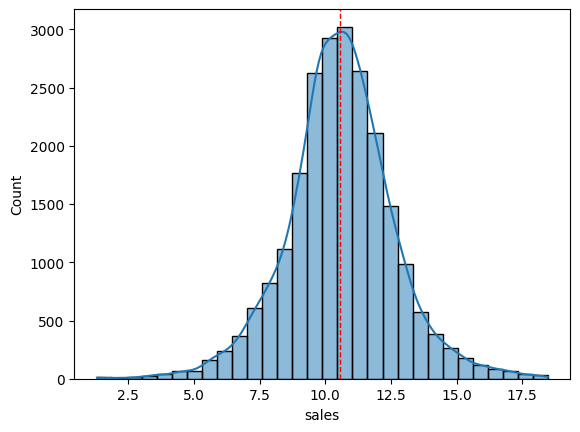

In [24]:
# Histograma da coluna sales sem os valores iguais a zero

sns.histplot(df_bisnode_2012.loc[df_bisnode_2012['sales'] > 0, "sales"], bins=30, kde=True)

plt.axvline(df_bisnode_2012.loc[df_bisnode_2012['sales'] > 0, "sales"].mean(), color='red', linestyle='dashed', linewidth=1)

plt.show()

Se não considerarmos os valores iguais a zero, a distribuição é muito proxima de uma distribuição normal.

Para não confundirmos as analises, iremos renomear a coluna sales como sales_log.

In [25]:
# Renomeando a coluna sales para sales_log

df_bisnode_2012.rename(columns={"sales": "sales_log"}, inplace=True)

df_bisnode_2012.head()

C:\Users\GBinfo\AppData\Local\Temp\ipykernel_20364\2351534428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisnode_2012.rename(columns={"sales": "sales_log"}, inplace=True)


,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales_log,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,target
7,1001034.00,2012-01-01,2012-12-31,140.74,148.15,21429.63,0.00,0.00,0.00,340.74,-2474.07,0.00,0.00,25.93,1862.96,285.19,-2474.07,0.00,-20940.74,1481.48,340.74,0,365,0,2012,1990.00,NaN,2.00,0.00,0.50,1954.00,4895.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,0.08,1.00
14,1001541.00,2012-01-01,2012-12-31,481.48,9629.63,1303.70,0.00,0.00,0.00,190566.67,-7696.30,0.00,0.00,9048.15,8351.85,0.00,-7722.22,7.09,191262.97,200740.73,190566.67,0,365,0,2012,2008.00,NaN,1.00,0.00,0.00,1974.00,3222.00,male,Domestic,5610.00,56.00,3.00,3,Central,2008-02-24,NaN,NaN,0.00
23,1002029.00,2012-01-01,2012-12-31,14929.63,203885.19,120444.45,0.00,0.00,0.00,23459.26,11818.52,0.00,677.78,15077.78,984270.38,41037.04,9722.22,13.94,93144.45,11111.11,23459.26,0,365,0,2012,2006.00,NaN,2.00,0.00,0.00,1975.00,3101.00,male,Domestic,2711.00,27.00,2.00,3,East,2006-07-03,NaN,0.46,0.00
35,1003200.00,2012-01-01,2012-12-31,25.93,22.22,10996.30,0.00,0.00,0.00,0.00,-2337.04,0.00,0.00,22.22,1933.33,1355.56,-2340.74,7.93,-23785.19,1851.85,0.00,0,365,0,2012,2003.00,2014.00,2.00,0.00,1.00,NaN,1754.00,female,Domestic,5630.00,56.00,3.00,1,Central,2003-10-21,2014-08-09,NaN,1.00
48,1007261.00,2012-01-01,2012-12-31,0.00,255.56,9207.41,0.00,0.00,0.00,0.00,-4670.37,0.00,0.00,255.56,0.00,4670.37,-4670.37,0.00,-8951.85,1851.85,0.00,0,365,0,2012,2010.00,2015.00,1.00,0.00,0.00,1962.00,1539.00,male,Domestic,5610.00,56.00,3.00,1,Central,2010-08-26,2015-11-19,0.08,1.00


- `Será que isso também se aplica para as demais?`

Primeiramente vamos separar as colunas númericas.

In [26]:
# Selecionando o nome das colunas númericas
colunas_numericas = df_bisnode_2012.select_dtypes(include=['number']).columns.to_list()

colunas_numericas

['comp_id',
 'amort',
 'curr_assets',
 'curr_liab',
 'extra_exp',
 'extra_inc',
 'extra_profit_loss',
 'fixed_assets',
 'inc_bef_tax',
 'intang_assets',
 'inventories',
 'liq_assets',
 'material_exp',
 'personnel_exp',
 'profit_loss_year',
 'sales_log',
 'share_eq',
 'subscribed_cap',
 'tang_assets',
 'balsheet_flag',
 'balsheet_length',
 'balsheet_notfullyear',
 'year',
 'founded_year',
 'exit_year',
 'ceo_count',
 'foreign',
 'female',
 'birth_year',
 'inoffice_days',
 'nace_main',
 'ind2',
 'ind',
 'urban_m',
 'labor_avg',
 'target']

Analisando se as colunas são categoricas.

In [27]:
# Obtendo as colunas númericas e não categoricas
ranking_colunas = sorted([(col, df_bisnode_2012[col].nunique()) for col in colunas_numericas], key=lambda x: x[1])

# Printando o resultado
for col, n in ranking_colunas:
    print(f'{col} : {n}')

year : 1
balsheet_flag : 2
balsheet_notfullyear : 2
target : 2
ind : 3
urban_m : 3
ceo_count : 8
exit_year : 9
female : 10
foreign : 11
founded_year : 31
ind2 : 65
birth_year : 218
nace_main : 273
balsheet_length : 344
extra_exp : 789
extra_inc : 1336
subscribed_cap : 1775
intang_assets : 1818
extra_profit_loss : 1867
labor_avg : 1893
amort : 5072
inventories : 6351
liq_assets : 7171
inoffice_days : 7551
profit_loss_year : 10631
tang_assets : 10807
fixed_assets : 11067
personnel_exp : 11105
inc_bef_tax : 11376
curr_assets : 12413
curr_liab : 13655
material_exp : 15883
sales_log : 17002
share_eq : 17740
comp_id : 28469


Como podemos ver pelo script acima, as colunas categoricas vão até a coluna balsheet_length, também sera necessario retirar a ultima coluna de comp_id.

In [28]:
# Realizando o primeiro corte
ranking_colunas = ranking_colunas[15:]

# Realizando o segundo corte
ranking_colunas = ranking_colunas[:-1]

ranking_colunas

[('extra_exp', 789),
 ('extra_inc', 1336),
 ('subscribed_cap', 1775),
 ('intang_assets', 1818),
 ('extra_profit_loss', 1867),
 ('labor_avg', 1893),
 ('amort', 5072),
 ('inventories', 6351),
 ('liq_assets', 7171),
 ('inoffice_days', 7551),
 ('profit_loss_year', 10631),
 ('tang_assets', 10807),
 ('fixed_assets', 11067),
 ('personnel_exp', 11105),
 ('inc_bef_tax', 11376),
 ('curr_assets', 12413),
 ('curr_liab', 13655),
 ('material_exp', 15883),
 ('sales_log', 17002),
 ('share_eq', 17740)]

A primeira analise de assimetria será utilizando a função skew().

In [29]:
# Ranking de skew()
ranking_skew = sorted([(col, df_bisnode_2012[col].skew()) for col, n in ranking_colunas], key=lambda x: x[1])

# Printando o resultado

for col, n in ranking_skew:
    print(f'{col} : {n}')

sales_log : -0.9536665381892234
inoffice_days : 1.0951473160270007
profit_loss_year : 7.802791761802183
labor_avg : 18.38516091814227
material_exp : 18.958043159215297
inventories : 25.746850720537342
curr_assets : 25.92736089996139
personnel_exp : 27.7265513273196
amort : 41.19364774691546
subscribed_cap : 74.19500579601413
curr_liab : 84.91490202937268
inc_bef_tax : 86.0391874914981
fixed_assets : 90.07168067670449
tang_assets : 96.72698133614497
extra_inc : 98.52658942520033
liq_assets : 101.36474333148189
extra_profit_loss : 114.82735574402324
share_eq : 118.2390127552435
extra_exp : 135.6316381073577
intang_assets : 164.4817517505811


A principio apenas as colunas sales_log e inoffice_days apresentam uma normalidade.

Para vizualizar esta assimetria, iremos plotar os histogramas.

In [30]:
# Criando lista de colunas para gráficos
grafico1 = [col for col, n in ranking_skew][:10]

grafico2 = [col for col, n in ranking_skew][10:]

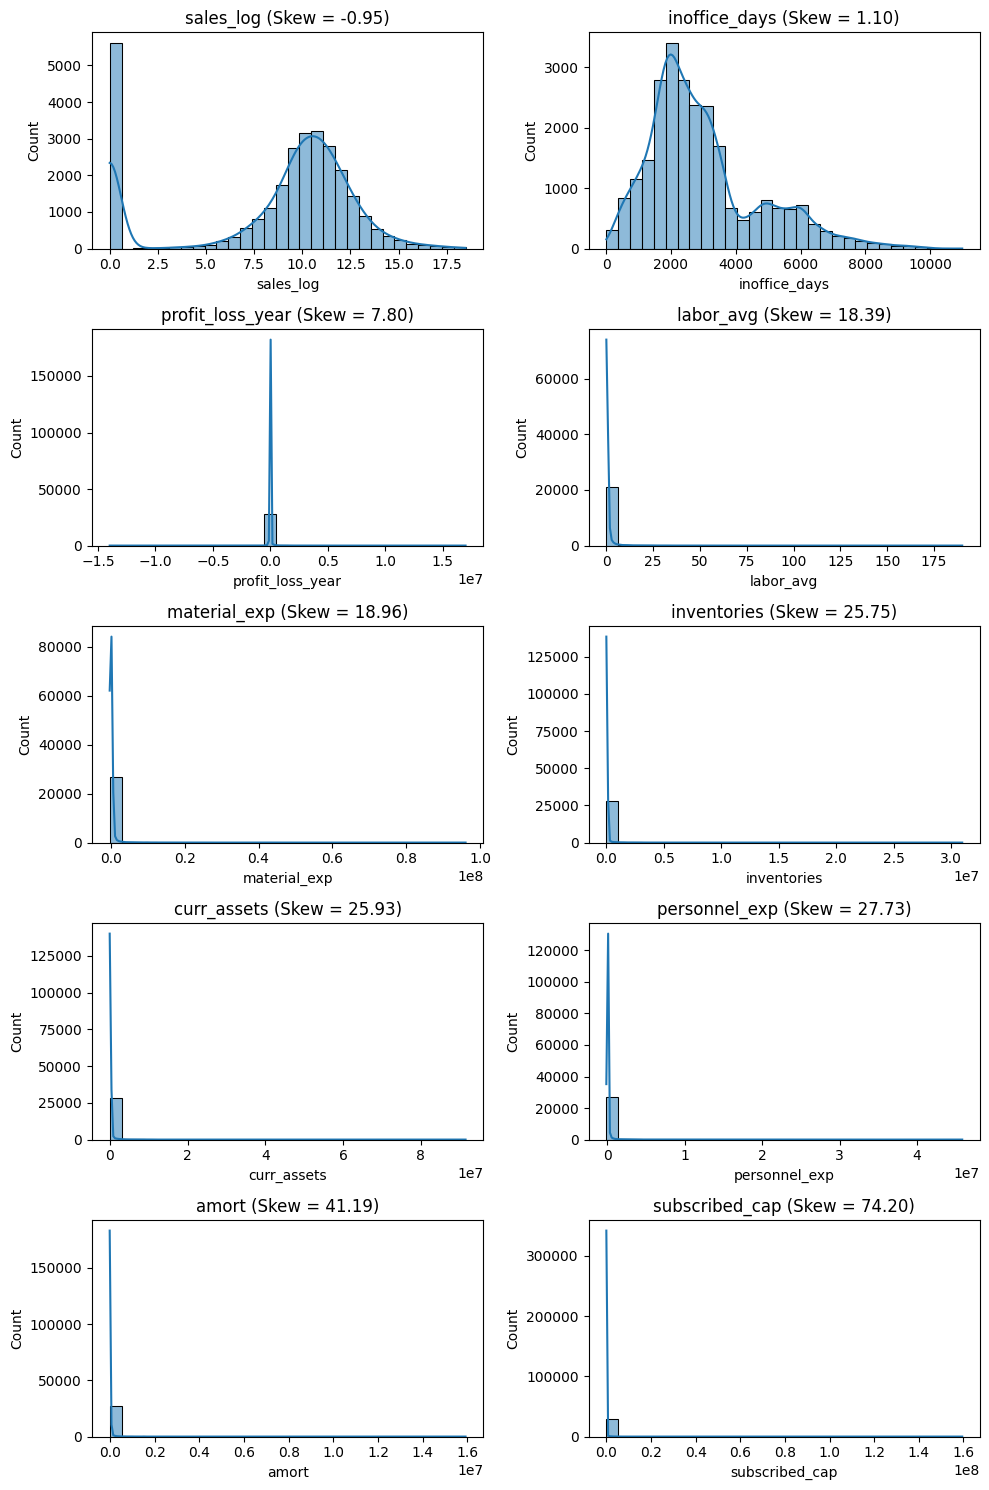

In [31]:
# Plotando primeira parte dos gráficos
# Criando figura 
fig, axes = plt.subplots(5, 2, figsize=(10, 15))

# Iterando para cada eixo
for i, ax in enumerate(axes.flat):
    if i < len(grafico1):  # Verificando para não exceder o índice
        col = grafico1[i]
        sns.histplot(df_bisnode_2012[col], bins=30, kde=True, ax=ax)
        
        # Calculando a assimetria
        skewness = df_bisnode_2012[col].skew()
        
        # Configurando o título com a assimetria
        ax.set_title(f"{col} (Skew = {skewness:.2f})")

plt.tight_layout()
plt.show()


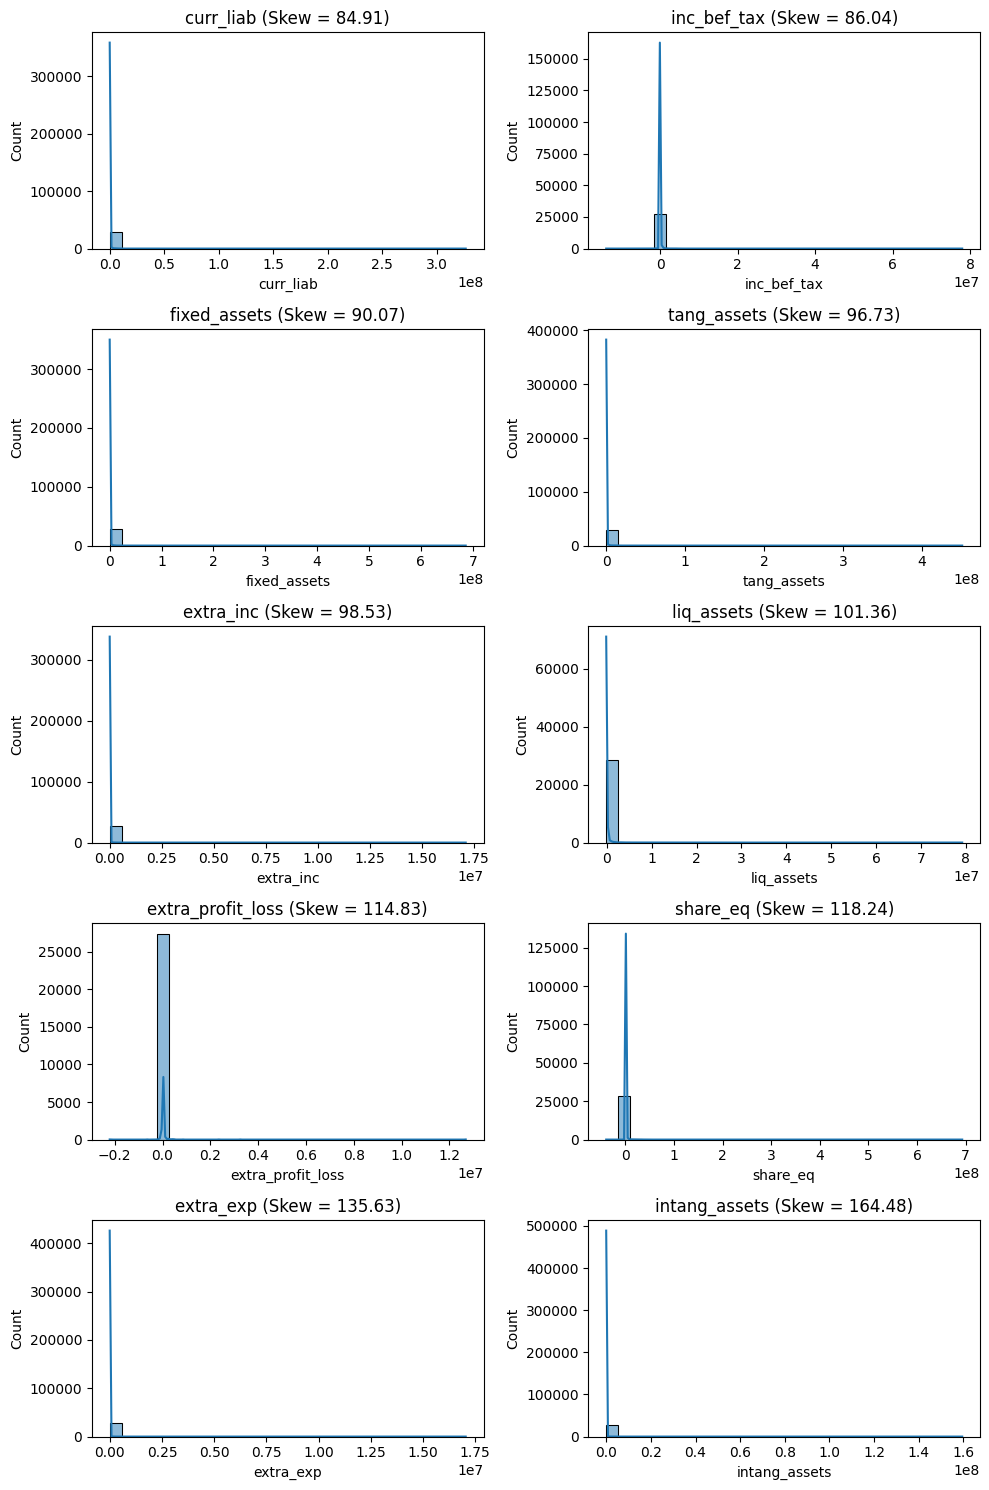

In [32]:
# Plotando segunda parte dos gráficos
# Criando figura 
fig, axes = plt.subplots(5, 2, figsize=(10, 15))

# Iterando para cada eixo
for i, ax in enumerate(axes.flat):
    if i < len(grafico2):  # Verificando para não exceder o índice
        col = grafico2[i]
        sns.histplot(df_bisnode_2012[col], bins=30, kde=True, ax=ax)
        
        # Calculando a assimetria
        skewness = df_bisnode_2012[col].skew()
        
        # Configurando o título com a assimetria
        ax.set_title(f"{col} (Skew = {skewness:.2f})")

plt.tight_layout()
plt.show()

Como já era esperado, apenas a coluna sales_log, que já havia sido tratada, e a coluna inoffice_days que não possuem problema de assimetria. As demais colunas serão analisadas na escala logarítmica.

Entretanto, é importante destacar uma sutil diferença no tratamento de colunas com valores negativos. Nesses casos, o logaritmo é aplicado ao valor absoluto. Se o valor da coluna for negativo, este é multiplicado por -1, conforme a equação a seguir:

$$ \text{"coluna"\_log}(x) = 
\begin{cases} 
\log(x) & \text{se } x > 0 \\
0 & \text{se } x = 0 \\
\log(|x|) * -1 & \text{se } x < 0 
\end{cases} $$


In [33]:
# Separando colunas para tratamento 
log_col_trat = [col for col,n in ranking_skew]

log_col_trat = log_col_trat[2:]

log_col_trat

['profit_loss_year',
 'labor_avg',
 'material_exp',
 'inventories',
 'curr_assets',
 'personnel_exp',
 'amort',
 'subscribed_cap',
 'curr_liab',
 'inc_bef_tax',
 'fixed_assets',
 'tang_assets',
 'extra_inc',
 'liq_assets',
 'extra_profit_loss',
 'share_eq',
 'extra_exp',
 'intang_assets']

Realizando os tratamentos de acordo com as funções acima.

In [34]:
# Realizando o tratamento nas colunas definidas
for col in log_col_trat:
    df_bisnode_2012[col] = df_bisnode_2012[col].apply(lambda x: np.log(x) if x > 0 else 0 if x == 0 else -1*np.log(abs(x)))
    df_bisnode_2012 = df_bisnode_2012.rename(columns={col: col+"_log"})

    
df_bisnode_2012

C:\Users\GBinfo\AppData\Local\Temp\ipykernel_20364\922099198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisnode_2012[col] = df_bisnode_2012[col].apply(lambda x: np.log(x) if x > 0 else 0 if x == 0 else -1*np.log(abs(x)))


,comp_id,begin,end,amort_log,curr_assets_log,curr_liab_log,extra_exp_log,extra_inc_log,extra_profit_loss_log,fixed_assets_log,inc_bef_tax_log,intang_assets_log,inventories_log,liq_assets_log,material_exp_log,personnel_exp_log,profit_loss_year_log,sales_log,share_eq_log,subscribed_cap_log,tang_assets_log,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg_log,target
7,1001034.00,2012-01-01,2012-12-31,4.95,5.00,9.97,0.00,0.00,0.00,5.83,-7.81,0.00,0.00,3.26,7.53,5.65,-7.81,0.00,-9.95,7.30,5.83,0,365,0,2012,1990.00,NaN,2.00,0.00,0.50,1954.00,4895.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,-2.48,1.00
14,1001541.00,2012-01-01,2012-12-31,6.18,9.17,7.17,0.00,0.00,0.00,12.16,-8.95,0.00,0.00,9.11,9.03,0.00,-8.95,7.09,12.16,12.21,12.16,0,365,0,2012,2008.00,NaN,1.00,0.00,0.00,1974.00,3222.00,male,Domestic,5610.00,56.00,3.00,3,Central,2008-02-24,NaN,NaN,0.00
23,1002029.00,2012-01-01,2012-12-31,9.61,12.23,11.70,0.00,0.00,0.00,10.06,9.38,0.00,6.52,9.62,13.80,10.62,9.18,13.94,11.44,9.32,10.06,0,365,0,2012,2006.00,NaN,2.00,0.00,0.00,1975.00,3101.00,male,Domestic,2711.00,27.00,2.00,3,East,2006-07-03,NaN,-0.78,0.00
35,1003200.00,2012-01-01,2012-12-31,3.26,3.10,9.31,0.00,0.00,0.00,0.00,-7.76,0.00,0.00,3.10,7.57,7.21,-7.76,7.93,-10.08,7.52,0.00,0,365,0,2012,2003.00,2014.00,2.00,0.00,1.00,NaN,1754.00,female,Domestic,5630.00,56.00,3.00,1,Central,2003-10-21,2014-08-09,NaN,1.00
48,1007261.00,2012-01-01,2012-12-31,0.00,5.54,9.13,0.00,0.00,0.00,0.00,-8.45,0.00,0.00,5.54,0.00,8.45,-8.45,0.00,-9.10,7.52,0.00,0,365,0,2012,2010.00,2015.00,1.00,0.00,0.00,1962.00,1539.00,male,Domestic,5610.00,56.00,3.00,1,Central,2010-08-26,2015-11-19,-2.48,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287779,463981969408.00,2012-01-01,2012-12-31,9.70,10.35,9.02,0.00,0.00,0.00,11.64,-10.84,0.00,0.00,8.74,12.00,10.97,-10.85,12.16,11.82,9.32,11.64,0,365,0,2012,1995.00,NaN,1.00,0.00,0.00,1957.00,7902.00,male,Domestic,2822.00,28.00,2.00,1,Central,1995-05-14,NaN,-0.60,0.00
287790,464021159936.00,2012-01-01,2012-12-31,8.18,10.36,9.79,0.00,0.00,0.00,10.36,6.14,0.00,9.31,7.05,10.34,7.90,5.56,10.55,10.72,9.32,10.36,0,365,0,2012,2006.00,NaN,1.00,0.00,0.00,NaN,1221.00,male,Domestic,2822.00,28.00,2.00,2,Central,2006-05-09,NaN,-2.48,0.00
287798,464044589056.00,2012-01-01,2012-12-31,11.24,15.38,14.08,0.00,0.00,0.00,12.56,13.76,0.00,13.59,11.89,15.61,14.06,11.91,15.96,13.36,11.44,12.56,0,365,0,2012,2008.00,NaN,1.00,1.00,0.00,NaN,2943.00,male,Foreign,3312.00,33.00,2.00,3,Central,2008-10-09,NaN,0.61,0.00
287814,464105013248.00,2012-01-01,2012-12-31,7.18,10.39,9.31,3.10,0.00,-3.10,9.00,6.05,0.00,8.37,9.61,11.48,11.07,5.33,11.95,10.30,9.32,9.00,0,365,0,2012,1989.00,NaN,3.00,0.00,0.67,1951.67,2076.67,mix,Domestic,5610.00,56.00,3.00,3,West,1989-04-28,NaN,0.06,0.00


Plotando os gráficos para conferir os resultados.

Devido à presença de muitos valores zerados nas colunas, optamos por desconsiderá-los ao plotar os histogramas, evitando assim uma visão distorcida.

In [35]:
# Criando lista com nomes corrigidos
log_col_trat = [col + "_log" for col in log_col_trat]

# separando gráficos

grafico1 = log_col_trat[:9]
grafico2 = log_col_trat[9:]

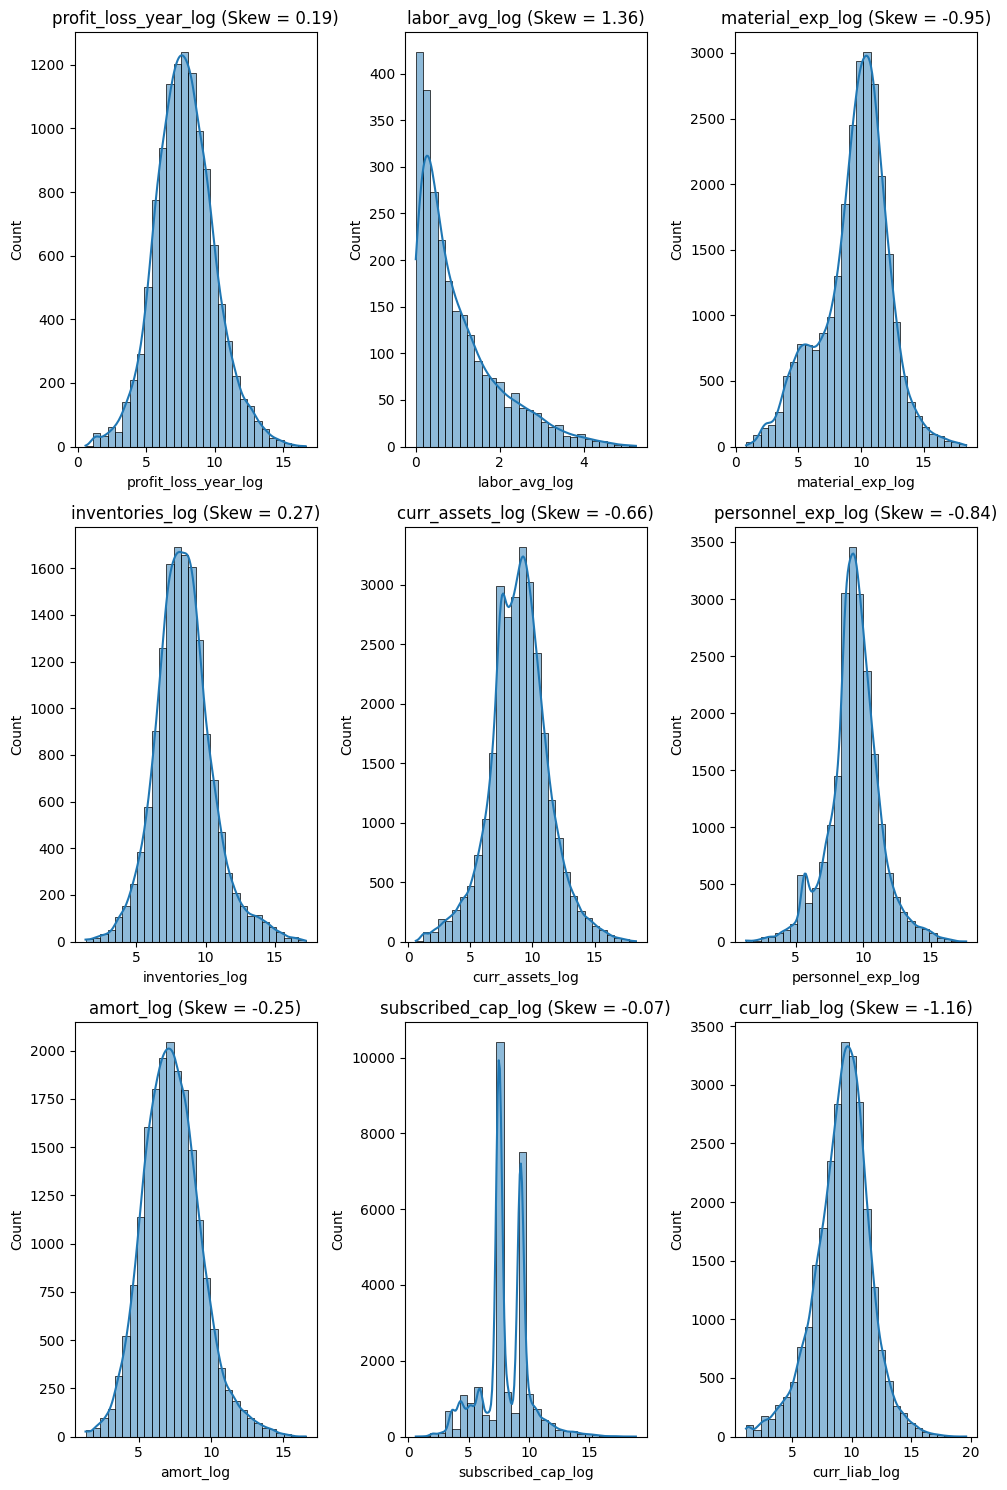

In [36]:
# Plotando primeira parte dos gráficos
# Criando figura 
fig, axes = plt.subplots(3, 3, figsize=(10, 15))

# Iterando para cada eixo
for i, ax in enumerate(axes.flat):
    if i < len(grafico1):  # Verificando para não exceder o índice
        col = grafico1[i]
        sns.histplot(df_bisnode_2012.loc[df_bisnode_2012[col] > 0, col], bins=30, kde=True, ax=ax)
        
        # Calculando a assimetria
        skewness = df_bisnode_2012[col].skew()
        
        # Configurando o título com a assimetria
        ax.set_title(f"{col} (Skew = {skewness:.2f})")

plt.tight_layout()
plt.show()

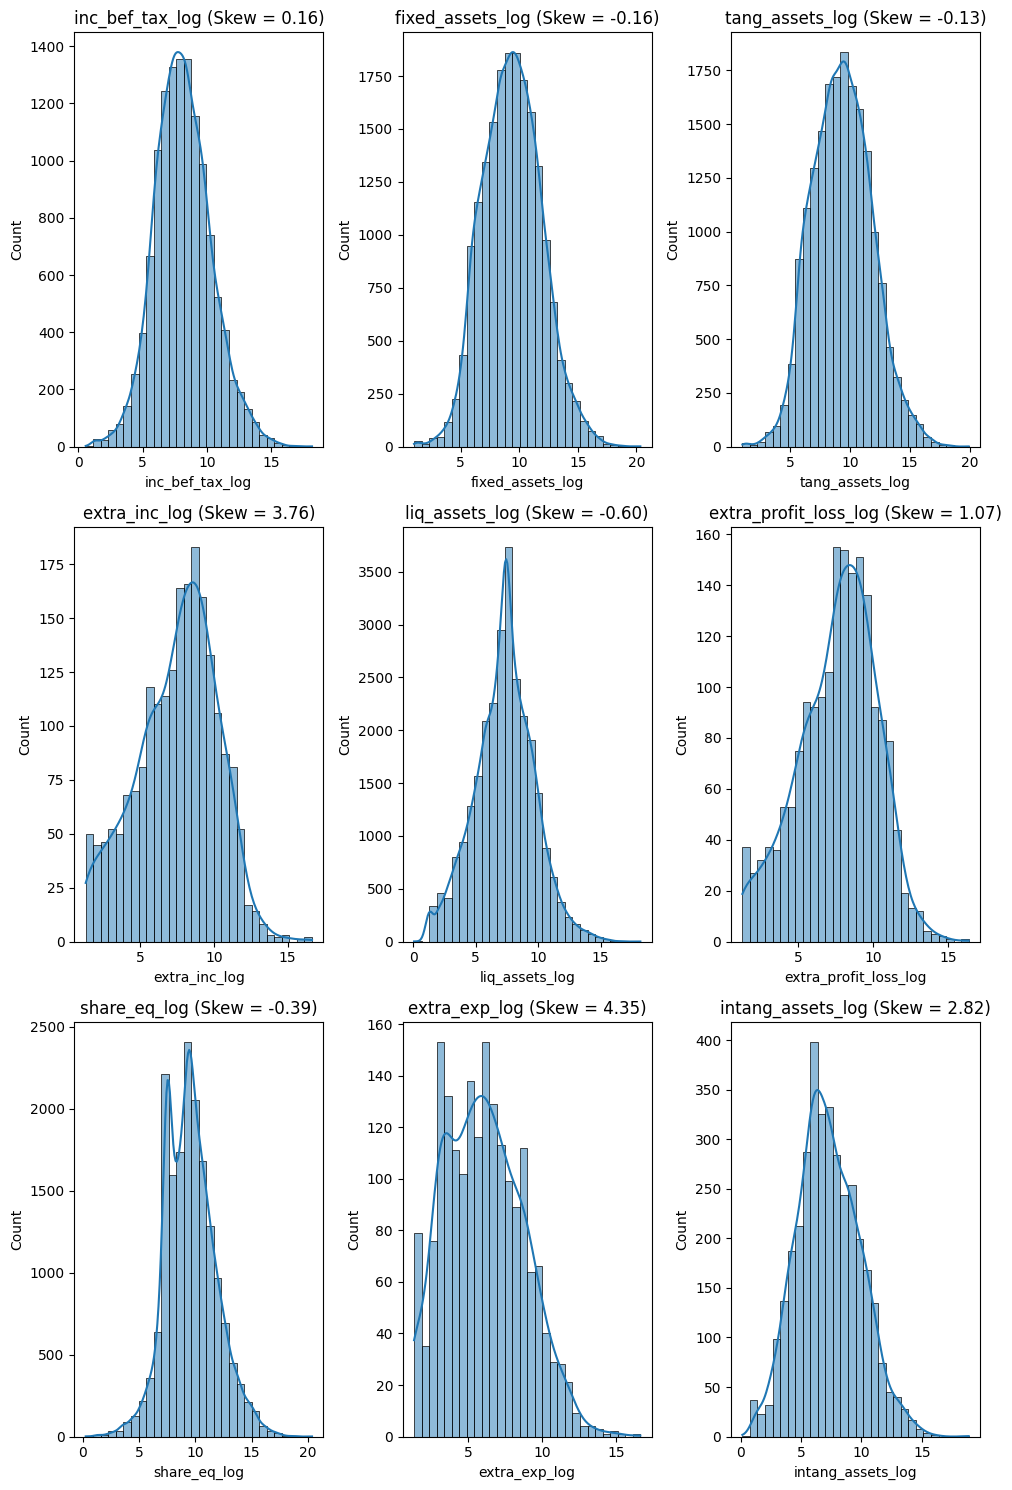

In [37]:
# Plotando segunda parte dos gráficos
# Criando figura 
fig, axes = plt.subplots(3, 3, figsize=(10, 15))

# Iterando para cada eixo
for i, ax in enumerate(axes.flat):
    if i < len(grafico2):  # Verificando para não exceder o índice
        col = grafico2[i]
        sns.histplot(df_bisnode_2012.loc[df_bisnode_2012[col] > 0, col], bins=30, kde=True, ax=ax)
        
        # Calculando a assimetria
        skewness = df_bisnode_2012[col].skew()
        
        # Configurando o título com a assimetria
        ax.set_title(f"{col} (Skew = {skewness:.2f})")

plt.tight_layout()
plt.show()

Após este tratamento, percebe-se que as distribuições ficaram bem mais proximas da normalidade.


Para simplificar a manipulação e interpretação das colunas nas quais foi aplicada a escala logarítmica, foi desenvolvida uma função que reverte esse processo, retornando a coluna ao seu estado inicial.

In [38]:
# Criando função que retorna os valores iniciais

def back_log(x):
    if x > 0:
        return np.exp(x)
    elif x == 0:
        return 0
    else:
        y = -1*x
        return np.exp(y) * -1

In [39]:
# Testando aplicação da função acima
df_bisnode_2012['profit_loss_year_log']

7         -7.81
14        -8.95
23         9.18
35        -7.76
48        -8.45
          ...  
287779   -10.85
287790     5.56
287798    11.91
287814     5.33
287825    -5.94
Name: profit_loss_year_log, Length: 28469, dtype: float64

In [40]:
df_bisnode_2012['profit_loss_year_log'].apply(back_log)

7         -2474.07
14        -7722.22
23         9722.22
35        -2340.74
48        -4670.37
            ...   
287779   -51351.85
287790      259.26
287798   148781.48
287814      207.41
287825     -381.48
Name: profit_loss_year_log, Length: 28469, dtype: float64

In [41]:
# Conferindo o resultado com df_bisnode
df_bisnode.loc[df_bisnode['year'] == 2012, "profit_loss_year"]

7         -2474.07
14        -7722.22
23         9722.22
35        -2340.74
48        -4670.37
            ...   
287779   -51351.85
287790      259.26
287798   148781.48
287814      207.41
287825     -381.48
Name: profit_loss_year, Length: 28469, dtype: float64

- `Crie novas colunas, como idade da empresa (faça isso pela subtração de
founded_year e year ). Ah, cuide bem dos missing values. np.where pode ajudar
bastante!`

Primeiramente, analisando os valores missing.

In [42]:
# Pritando a porcentagem de valores com missing data 

missing_data_df(df_bisnode_2012[['year', 'founded_year', 'founded_date']])

founded_year   11.20
founded_date    0.01
year            0.00
dtype: float64

A couna founded_year é gerada a parir da coluna founded date. Porém ela possui muitos valores nulos, diferente da coluna founded_date que está completa, por conta disto, iremos calcular as idades das empresas a partir desta coluna.

In [43]:
# Transformando as colunas de object para datetime

df_bisnode_2012["founded_date"] = pd.to_datetime(df_bisnode_2012["founded_date"])

df_bisnode_2012['founded_date'].dtype

dtype('<M8[ns]')

In [44]:
# Conferindo igualdade das colunas
sum(df_bisnode_2012['founded_date'].dt.year == df_bisnode_2012['founded_year'])

25280

In [45]:
# Dividindo as linhas que diferem pelo total de linhas

sum(df_bisnode_2012['founded_date'].dt.year != df_bisnode_2012['founded_year'])/df_bisnode_2012.shape[0]

0.11201657943728266

In [46]:
# Cálculando a idade

df_bisnode_2012['comp_age'] = df_bisnode_2012['year'] - df_bisnode_2012['founded_date'].dt.year

df_bisnode_2012.head()

,comp_id,begin,end,amort_log,curr_assets_log,curr_liab_log,extra_exp_log,extra_inc_log,extra_profit_loss_log,fixed_assets_log,inc_bef_tax_log,intang_assets_log,inventories_log,liq_assets_log,material_exp_log,personnel_exp_log,profit_loss_year_log,sales_log,share_eq_log,subscribed_cap_log,tang_assets_log,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg_log,target,comp_age
7,1001034.00,2012-01-01,2012-12-31,4.95,5.00,9.97,0.00,0.00,0.00,5.83,-7.81,0.00,0.00,3.26,7.53,5.65,-7.81,0.00,-9.95,7.30,5.83,0,365,0,2012,1990.00,NaN,2.00,0.00,0.50,1954.00,4895.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,-2.48,1.00,22.00
14,1001541.00,2012-01-01,2012-12-31,6.18,9.17,7.17,0.00,0.00,0.00,12.16,-8.95,0.00,0.00,9.11,9.03,0.00,-8.95,7.09,12.16,12.21,12.16,0,365,0,2012,2008.00,NaN,1.00,0.00,0.00,1974.00,3222.00,male,Domestic,5610.00,56.00,3.00,3,Central,2008-02-24,NaN,NaN,0.00,4.00
23,1002029.00,2012-01-01,2012-12-31,9.61,12.23,11.70,0.00,0.00,0.00,10.06,9.38,0.00,6.52,9.62,13.80,10.62,9.18,13.94,11.44,9.32,10.06,0,365,0,2012,2006.00,NaN,2.00,0.00,0.00,1975.00,3101.00,male,Domestic,2711.00,27.00,2.00,3,East,2006-07-03,NaN,-0.78,0.00,6.00
35,1003200.00,2012-01-01,2012-12-31,3.26,3.10,9.31,0.00,0.00,0.00,0.00,-7.76,0.00,0.00,3.10,7.57,7.21,-7.76,7.93,-10.08,7.52,0.00,0,365,0,2012,2003.00,2014.00,2.00,0.00,1.00,NaN,1754.00,female,Domestic,5630.00,56.00,3.00,1,Central,2003-10-21,2014-08-09,NaN,1.00,9.00
48,1007261.00,2012-01-01,2012-12-31,0.00,5.54,9.13,0.00,0.00,0.00,0.00,-8.45,0.00,0.00,5.54,0.00,8.45,-8.45,0.00,-9.10,7.52,0.00,0,365,0,2012,2010.00,2015.00,1.00,0.00,0.00,1962.00,1539.00,male,Domestic,5610.00,56.00,3.00,1,Central,2010-08-26,2015-11-19,-2.48,1.00,2.00


Analisando o resultado

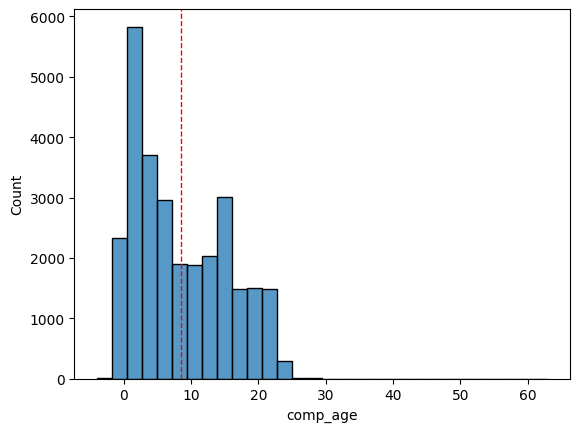

In [47]:
# Plotando histograma


sns.histplot(df_bisnode_2012['comp_age'], bins=30)

plt.axvline(df_bisnode_2012['comp_age'].mean(), color='red', linestyle='dashed', linewidth=1)


plt.show()

In [48]:
# Analisando valores negativos

df_bisnode_2012[df_bisnode_2012['comp_age'] < 0].head(10)

,comp_id,begin,end,amort_log,curr_assets_log,curr_liab_log,extra_exp_log,extra_inc_log,extra_profit_loss_log,fixed_assets_log,inc_bef_tax_log,intang_assets_log,inventories_log,liq_assets_log,material_exp_log,personnel_exp_log,profit_loss_year_log,sales_log,share_eq_log,subscribed_cap_log,tang_assets_log,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg_log,target,comp_age
2050,24919462.00,2012-01-01,2012-12-31,7.22,10.33,10.14,0.00,0.00,0.00,0.00,6.31,0.00,10.22,7.66,11.90,7.28,5.64,11.92,8.54,4.71,0.00,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5610.00,56.00,3.00,2,East,2013-06-28,NaN,NaN,0.00,-1.00
5193,149296720.00,2012-04-23,2012-12-31,NaN,7.52,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,7.52,NaN,NaN,0.00,0.00,7.52,7.52,0.00,1,252,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5610.00,56.00,3.00,3,Central,2013-04-19,NaN,NaN,1.00,-1.00
6893,276835232.00,2012-01-01,2012-12-31,8.45,10.19,11.50,3.26,0.00,-3.26,9.55,8.80,0.00,8.38,9.75,11.72,10.75,8.80,12.01,-10.97,5.40,9.55,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5610.00,56.00,3.00,2,Central,2013-10-14,NaN,NaN,0.00,-1.00
12592,894504384.00,2012-01-01,2012-12-31,9.17,12.79,10.31,0.00,0.00,0.00,12.54,11.31,6.31,9.16,10.75,12.28,11.06,11.21,12.92,12.14,9.32,12.53,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5510.00,55.00,3.00,3,West,2013-09-16,NaN,NaN,0.00,-1.00
13009,948919232.00,2012-01-01,2012-12-31,8.07,11.24,9.75,7.45,0.00,-7.45,10.41,10.10,0.00,9.96,10.54,12.35,11.02,9.39,12.66,11.13,8.22,10.41,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2822.00,28.00,2.00,1,Central,2013-06-19,NaN,NaN,0.00,-1.00
30029,5070869504.00,2012-01-01,2012-12-31,9.85,13.22,12.95,2.92,0.00,-2.92,11.63,10.24,0.00,10.99,11.96,13.49,12.81,10.20,13.88,12.13,10.70,11.63,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2829.00,28.00,2.00,2,Central,2013-11-05,NaN,NaN,0.00,-1.00
48714,13183213568.00,2012-01-01,2012-12-31,11.67,9.65,12.82,0.00,0.00,0.00,15.10,-11.67,8.71,8.29,7.52,12.30,12.20,-11.68,13.17,12.37,11.95,15.10,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5510.00,55.00,3.00,2,Central,2013-12-18,NaN,NaN,0.00,-1.00
63916,22589407232.00,2012-01-01,2012-12-31,8.51,10.89,10.04,0.00,0.00,0.00,12.31,-9.03,0.00,9.04,8.85,9.60,8.37,-9.04,9.06,12.44,7.99,10.55,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2651.00,26.00,2.00,1,Central,2013-06-30,NaN,NaN,0.00,-1.00
64393,22929582080.00,2012-01-01,2012-12-31,11.88,14.84,14.70,8.29,5.84,-8.20,13.54,12.33,8.33,13.93,6.75,16.13,14.72,11.85,16.38,13.81,10.78,13.53,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,West,2016-02-29,NaN,NaN,0.00,-4.00
76797,32762394624.00,2012-01-01,2012-12-31,7.91,10.43,8.29,0.00,0.00,0.00,10.24,8.53,0.00,8.57,10.10,12.21,11.22,8.41,12.55,10.71,6.83,10.24,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5630.00,56.00,3.00,3,East,2014-06-04,NaN,NaN,0.00,-2.00


In [49]:
# Analisando numero valores negativos

df_bisnode_2012[df_bisnode_2012['comp_age'] < 0].shape[0]

38

Existe algumas inconsistências nestes dados, já que essas empresas apresentam um balanço referente ao ano de 2012, porém têm o ano de criação registrado como posterior a 2012. Devido a essas incongruências e ao fato de serem poucas linhas afetadas(apenas 38), optaremos por excluí-las da análise.

In [50]:
# Retirando linhas com idade negativa da analise
df_bisnode_2012 = df_bisnode_2012[df_bisnode_2012['comp_age'] > 0]

print("Empresas com idade menor do que zero:")
df_bisnode_2012[df_bisnode_2012['comp_age']<0].shape[0]

Empresas com idade menor do que zero:


0

- `Filtre seus dados para ter empresas que possuem receita (revenue) abaixo de 10
milhões de euros e acima de 1000 euros.`

Considerando a coluna sales como revenue.

In [51]:
# Recriando a coluna sales sem escala logaritica
df_bisnode_2012['sales_revenue'] = np.exp(df_bisnode_2012["sales_log"])

# Armazenando o numero de linhas antes do tratamento
pre_revenue_filter = df_bisnode_2012.shape[0]

# Realizando o filtro
df_bisnode_2012 = df_bisnode_2012[(df_bisnode_2012["sales_revenue"] > 1000) & (df_bisnode_2012["sales_revenue"] < 10000000)]

df_bisnode_2012 = df_bisnode_2012.drop(columns=["sales_revenue"])

df_bisnode_2012


C:\Users\GBinfo\AppData\Local\Temp\ipykernel_20364\1505639890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisnode_2012['sales_revenue'] = np.exp(df_bisnode_2012["sales_log"])


,comp_id,begin,end,amort_log,curr_assets_log,curr_liab_log,extra_exp_log,extra_inc_log,extra_profit_loss_log,fixed_assets_log,inc_bef_tax_log,intang_assets_log,inventories_log,liq_assets_log,material_exp_log,personnel_exp_log,profit_loss_year_log,sales_log,share_eq_log,subscribed_cap_log,tang_assets_log,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg_log,target,comp_age
14,1001541.00,2012-01-01,2012-12-31,6.18,9.17,7.17,0.00,0.00,0.00,12.16,-8.95,0.00,0.00,9.11,9.03,0.00,-8.95,7.09,12.16,12.21,12.16,0,365,0,2012,2008.00,NaN,1.00,0.00,0.00,1974.00,3222.00,male,Domestic,5610.00,56.00,3.00,3,Central,2008-02-24,NaN,NaN,0.00,4.00
23,1002029.00,2012-01-01,2012-12-31,9.61,12.23,11.70,0.00,0.00,0.00,10.06,9.38,0.00,6.52,9.62,13.80,10.62,9.18,13.94,11.44,9.32,10.06,0,365,0,2012,2006.00,NaN,2.00,0.00,0.00,1975.00,3101.00,male,Domestic,2711.00,27.00,2.00,3,East,2006-07-03,NaN,-0.78,0.00,6.00
35,1003200.00,2012-01-01,2012-12-31,3.26,3.10,9.31,0.00,0.00,0.00,0.00,-7.76,0.00,0.00,3.10,7.57,7.21,-7.76,7.93,-10.08,7.52,0.00,0,365,0,2012,2003.00,2014.00,2.00,0.00,1.00,NaN,1754.00,female,Domestic,5630.00,56.00,3.00,1,Central,2003-10-21,2014-08-09,NaN,1.00,9.00
56,1011889.00,2012-01-01,2012-12-31,10.51,11.98,9.85,0.00,0.00,0.00,13.75,11.48,7.34,9.38,11.79,12.23,11.44,11.48,12.98,13.88,9.77,13.75,0,365,0,2012,1992.00,NaN,1.00,0.00,0.00,1946.00,6198.00,male,Domestic,5510.00,55.00,3.00,2,West,1992-11-09,NaN,0.48,0.00,20.00
68,1014183.00,2012-01-01,2012-12-31,9.44,12.21,9.02,0.00,2.00,2.00,11.68,-7.27,0.00,0.00,9.83,11.11,10.93,-7.76,11.77,12.64,9.32,11.68,0,365,0,2012,2001.00,NaN,1.00,0.00,0.00,1946.00,3594.00,male,Domestic,5510.00,55.00,3.00,2,Central,2001-12-21,NaN,-0.34,0.00,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287764,463885369344.00,2012-01-01,2012-12-31,6.30,9.57,9.50,0.00,0.00,0.00,8.99,7.76,0.00,0.00,9.53,11.89,9.18,7.76,11.96,8.79,7.52,8.99,0,365,0,2012,2009.00,NaN,1.00,0.00,0.00,1978.00,2615.00,male,Domestic,4331.00,43.00,NaN,3,East,2009-02-25,NaN,-2.11,0.00,3.00
287779,463981969408.00,2012-01-01,2012-12-31,9.70,10.35,9.02,0.00,0.00,0.00,11.64,-10.84,0.00,0.00,8.74,12.00,10.97,-10.85,12.16,11.82,9.32,11.64,0,365,0,2012,1995.00,NaN,1.00,0.00,0.00,1957.00,7902.00,male,Domestic,2822.00,28.00,2.00,1,Central,1995-05-14,NaN,-0.60,0.00,17.00
287790,464021159936.00,2012-01-01,2012-12-31,8.18,10.36,9.79,0.00,0.00,0.00,10.36,6.14,0.00,9.31,7.05,10.34,7.90,5.56,10.55,10.72,9.32,10.36,0,365,0,2012,2006.00,NaN,1.00,0.00,0.00,NaN,1221.00,male,Domestic,2822.00,28.00,2.00,2,Central,2006-05-09,NaN,-2.48,0.00,6.00
287798,464044589056.00,2012-01-01,2012-12-31,11.24,15.38,14.08,0.00,0.00,0.00,12.56,13.76,0.00,13.59,11.89,15.61,14.06,11.91,15.96,13.36,11.44,12.56,0,365,0,2012,2008.00,NaN,1.00,1.00,0.00,NaN,2943.00,male,Foreign,3312.00,33.00,2.00,3,Central,2008-10-09,NaN,0.61,0.00,4.00


In [52]:
# Analisando o numero de linhas
print(f"Número de linhas pré fitro {pre_revenue_filter}")
print(f"Núemro de linha pós filtros {df_bisnode_2012.shape[0]}")

Número de linhas pré fitro 26124
Núemro de linha pós filtros 20316


### **Tratamentos do Grupo**

Nesta parte do código está o tratamento e seleção de variaveis realizados pelo grupo. 

O output desta parte será o dataframe chamdo df_final, que será utilizado na modelagem de classificação.

In [53]:
# Criando dataframe final
df_final = df_bisnode_2012.copy()

#### `Colunas "balsheet"`

Entre as variáveis, existem três colunas que contêm informações que não serão incorporadas na modelagem: `balsheet_flag`, `balsheet_length` e `balsheet_notfullyear`.

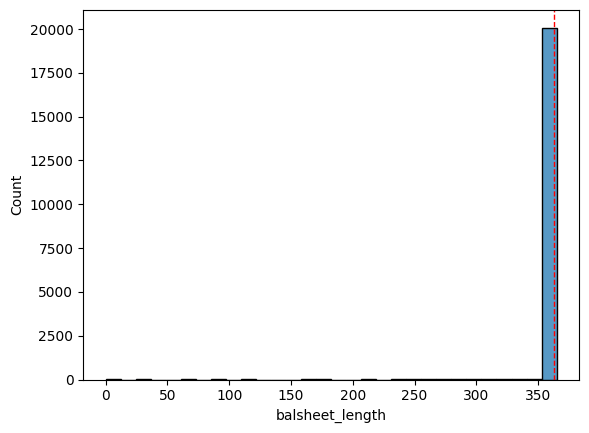

In [54]:
# Histograma balsheet_length

sns.histplot(df_bisnode_2012['balsheet_length'], bins=30)

plt.axvline(df_bisnode_2012["balsheet_length"].mean(), color='red', linestyle='dashed', linewidth=1)


plt.show()

Como podemos perceber, a grande maioria das observações possui o ano completo.

In [55]:
# Verificando balanços que não consideram o ano cheio

df_bisnode_2012[df_bisnode_2012['balsheet_length'] < 365].shape[0]/df_bisnode_2012.shape[0]

0.01304390628076393

Apenas 1,3% do data frame não possui anos completos, por conta disso iremos retirar estas linhas da analise.

In [56]:
# Retirando linhas e colunas do dataframe final

# Retirando linhas de balanços com o ano incompleto

df_final = df_final[df_final['balsheet_length'] >= 365]

# Retirando as três colunas

df_final = df_final.drop(columns=["balsheet_length", "balsheet_flag", "balsheet_notfullyear"])

####  `Idade dos CEOs`

Na base de dados, temos a coluna birth year que indica o ano de nascimento dos CEOs. Para facilitar a modelagem e seguir uma abordagem semelhante à adotada para as empresas, decidimos trabalhar com a idade dos CEOs em vez do ano de nascimento. Para calcular a idade, vamos subtrair o valor da coluna birth year do ano atual, que é fornecido na coluna year. Esse cálculo nos dará a idade atual do CEO no ano correspondente.

In [57]:
# Analisando a quantidade de valores missing
missing_data_df(df_final)['birth_year']

20.328163183881102

Como temos um número consideravel de valores missing, iremos tratar a coluna.

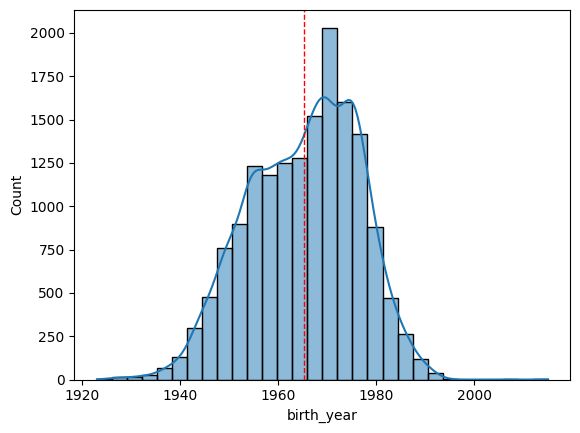

In [58]:
# Plotando histograma para observar

sns.histplot(df_final['birth_year'], bins=30, kde=True)

plt.axvline(df_final['birth_year'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.show()

Considerando que a coluna possui uma distribuição normal, iremos preencher as colunas com valores faltantes de maneira aleatoria considerando a média e desvio desta distribuição.

In [59]:
# Obtendo a média e desvio padrão
birth_year_mean = df_final["birth_year"].mean()
birth_year_std = df_final["birth_year"].std()

# Criando valores aleatorios para preencher valores faltantes
missing_count = sum(df_final['birth_year'].isna())
random_values = np.random.normal(birth_year_mean, birth_year_std, missing_count)
random_values = np.round(random_values).astype(int)

#Definindo semente aleatoria
random.seed(123) 
df_final.loc[df_final['birth_year'].isna(), "birth_year"] = random_values

# Conferindo o valor de missing
sum(df_final['birth_year'].isna())

0

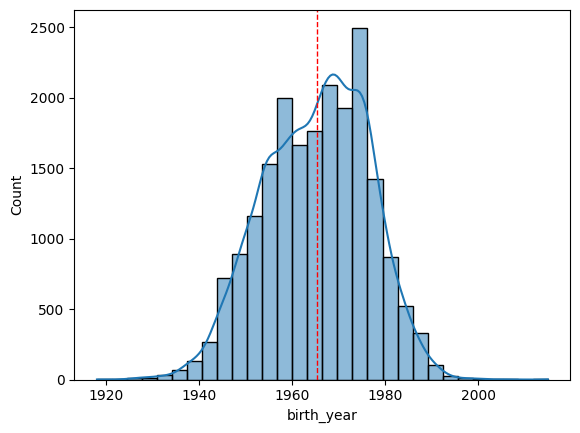

In [60]:
# Plotando as duas distribuições lado a lado

sns.histplot(df_final['birth_year'], bins=30, kde=True)

plt.axvline(df_final['birth_year'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.show()

Como pode ser observado a distribuição manteve o mesmo padrão de normalidade. Da mesma forma que o ano das empresas, esta coluna será desconsiderada, e a modelagem será realizada com base na idade dos CEOs.

In [61]:
# Criando dataframe com idade dos CEOs
df_final['CEO_age'] = df_final['year'] - df_final['birth_year']

Após o cálculo da idade, a coluna birth_year se torna dispensavel e sera retirada da analise.

In [62]:
# Retirando coluna de birth_year 
df_final = df_final.drop(columns=['birth_year'])

####  `Colunas de datas` 

Considerando que optamos por usar as idades em vez das datas e tendo em vista o filtro aplicado para o ano de 2012, as colunas begin, end, year, founded_year, exit_year, founded_date e exit_date podem ser excluídas da modelagem.

In [63]:
# Retirando colunas do dataframe
df_final = df_final.drop(columns=["begin", "end" , "year","founded_year", "exit_year", "founded_date", "exit_date"])

####  `Colunas categóricas correlacionadas`

Analisando as colunas do código NACE, que demonstra o setor em que a empresa atua.

In [64]:
# Número de setores com 4 digitos
df_final['nace_main'].value_counts().shape[0]

245

In [65]:
# Número de setores com 2 digitos
df_final["ind2"].value_counts().shape[0]

59

In [66]:
# Número de setores geral
df_final['ind'].value_counts().shape[0]

3

In [67]:
# Analisando setores não classificados como ind
df_final.loc[~df_final['ind'].isin([3, 2, 1]), "ind2"].value_counts()

32.00    147
47.00     73
68.00     61
46.00     45
43.00     41
95.00     20
25.00     20
62.00     13
71.00     13
70.00     13
41.00     12
96.00     11
66.00     11
82.00      9
86.00      9
45.00      9
93.00      8
73.00      8
69.00      7
77.00      7
81.00      7
74.00      7
49.00      6
85.00      6
16.00      5
79.00      4
92.00      4
72.00      4
1.00       4
31.00      3
18.00      3
11.00      3
22.00      3
42.00      3
90.00      3
63.00      2
2.00       2
80.00      2
10.00      2
23.00      2
78.00      2
87.00      2
14.00      1
58.00      1
84.00      1
15.00      1
59.00      1
37.00      1
61.00      1
52.00      1
36.00      1
Name: ind2, dtype: int64

Tanto a coluna "nace_main" quanto a "ind2" apresentam problemas devido ao número limitado de observações. Muitas empresas são representadas por uma única observação, o que pode comprometer os resultados da nossa abordagem. Devido a isso, optamos por usar a coluna "ind", que tem uma classificação mais abrangente. No entanto, como essa coluna tem muitos valores zerados, essas entradas serão categorizadas como "4".

In [68]:
# Retirando as colunas nace_main e ind2

df_final = df_final.drop(columns=["nace_main", "ind2"])

In [69]:
# Criando a 4 categoria

df_final.loc[df_final['ind'].isna(), "ind"] = 4

df_final['ind'].value_counts()

3.00    13633
2.00     5367
4.00      626
1.00      425
Name: ind, dtype: int64

#### `Criando Variavel de Endividamento`

O Índice de Endividamento Geral é um dos indicadores financeiros mais básicos utilizados na análise de endividamento da empresa.

Ele determina a proporção do endividamento da empresa em comparação com o total do seu ativo. Em outras palavras, o quanto dos ativos do negócio estão financiados por terceiros.

O seu cálculo é feito ao dividir o total da dívida de curto e de longo prazo pelo total do ativo.

EG = (Capital de terceiros/ Ativos totais)

In [70]:
# Criando coluna de Endividamento

def endividamento(df):
    # Criando df de processamento
    df_process = df[["curr_assets_log", "curr_liab_log","fixed_assets_log"]].copy()

    # Desfazendo escala logartimica
    df_process["curr_assets"] = df_process["curr_assets_log"].apply(back_log)
    df_process["curr_liab"] = df_process["curr_liab_log"].apply(back_log)
    df_process["fixed_assets"] = df_process["fixed_assets_log"].apply(back_log)

    # Realizando cálculo do endividamento
    df_process["endividamento"] = df_process['curr_liab'] / ( df_process['curr_assets'] + df_process['fixed_assets'])

    # Adicionando coluna endividamento no df_final
    df_done = df.copy()
    df_done["endividamento"] = df_process["endividamento"]

    return df_done


df_final = endividamento(df_final)

df_final

,comp_id,amort_log,curr_assets_log,curr_liab_log,extra_exp_log,extra_inc_log,extra_profit_loss_log,fixed_assets_log,inc_bef_tax_log,intang_assets_log,inventories_log,liq_assets_log,material_exp_log,personnel_exp_log,profit_loss_year_log,sales_log,share_eq_log,subscribed_cap_log,tang_assets_log,ceo_count,foreign,female,inoffice_days,gender,origin,ind,urban_m,region_m,labor_avg_log,target,comp_age,CEO_age,endividamento
14,1001541.00,6.18,9.17,7.17,0.00,0.00,0.00,12.16,-8.95,0.00,0.00,9.11,9.03,0.00,-8.95,7.09,12.16,12.21,12.16,1.00,0.00,0.00,3222.00,male,Domestic,3.00,3,Central,NaN,0.00,4.00,38.00,0.01
23,1002029.00,9.61,12.23,11.70,0.00,0.00,0.00,10.06,9.38,0.00,6.52,9.62,13.80,10.62,9.18,13.94,11.44,9.32,10.06,2.00,0.00,0.00,3101.00,male,Domestic,2.00,3,East,-0.78,0.00,6.00,37.00,0.53
35,1003200.00,3.26,3.10,9.31,0.00,0.00,0.00,0.00,-7.76,0.00,0.00,3.10,7.57,7.21,-7.76,7.93,-10.08,7.52,0.00,2.00,0.00,1.00,1754.00,female,Domestic,3.00,1,Central,NaN,1.00,9.00,54.00,494.83
56,1011889.00,10.51,11.98,9.85,0.00,0.00,0.00,13.75,11.48,7.34,9.38,11.79,12.23,11.44,11.48,12.98,13.88,9.77,13.75,1.00,0.00,0.00,6198.00,male,Domestic,3.00,2,West,0.48,0.00,20.00,66.00,0.02
68,1014183.00,9.44,12.21,9.02,0.00,2.00,2.00,11.68,-7.27,0.00,0.00,9.83,11.11,10.93,-7.76,11.77,12.64,9.32,11.68,1.00,0.00,0.00,3594.00,male,Domestic,3.00,2,Central,-0.34,0.00,11.00,66.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287764,463885369344.00,6.30,9.57,9.50,0.00,0.00,0.00,8.99,7.76,0.00,0.00,9.53,11.89,9.18,7.76,11.96,8.79,7.52,8.99,1.00,0.00,0.00,2615.00,male,Domestic,4.00,3,East,-2.11,0.00,3.00,34.00,0.59
287779,463981969408.00,9.70,10.35,9.02,0.00,0.00,0.00,11.64,-10.84,0.00,0.00,8.74,12.00,10.97,-10.85,12.16,11.82,9.32,11.64,1.00,0.00,0.00,7902.00,male,Domestic,2.00,1,Central,-0.60,0.00,17.00,55.00,0.06
287790,464021159936.00,8.18,10.36,9.79,0.00,0.00,0.00,10.36,6.14,0.00,9.31,7.05,10.34,7.90,5.56,10.55,10.72,9.32,10.36,1.00,0.00,0.00,1221.00,male,Domestic,2.00,2,Central,-2.48,0.00,6.00,46.00,0.28
287798,464044589056.00,11.24,15.38,14.08,0.00,0.00,0.00,12.56,13.76,0.00,13.59,11.89,15.61,14.06,11.91,15.96,13.36,11.44,12.56,1.00,1.00,0.00,2943.00,male,Foreign,2.00,3,Central,0.61,0.00,4.00,62.00,0.26


In [71]:
df_final.loc[(df_final['endividamento'] == np.inf) | (df_final['endividamento'] == -np.inf), "endividamento"] = 0

In [72]:
df_final[(df_final['endividamento'] == np.inf) | (df_final['endividamento'] == -np.inf)].shape[0]

0

#### `Criando variavel debt_equity`

O índice Debt-to-equity é utilizado para avaliar a alavancagem financeira de uma empresa e é calculado dividindo as obrigações totais da empresa pelo seu patrimônio líquido. O índice é uma métrica importante em finanças corporativas. É uma medida do grau em que uma empresa está financiando suas operações com dívida em vez de recursos próprios.

In [73]:
# Criando variavel debt_equity


def debt_equity(df):
    # Criando dataframe de processamento
    df_process = df[["curr_liab_log", "share_eq_log", "subscribed_cap_log"]]

    # Desfazendo escala logartimica
    df_process["curr_liab"] = df_process["curr_liab_log"].apply(back_log)
    df_process["share_eq"] = df_process["share_eq_log"].apply(back_log)
    df_process["subscribed_cap"] = df_process["subscribed_cap_log"].apply(back_log)
    
    # Realizando cálculo
    df_process['debt_equity'] = (df_process['curr_liab']) / ((df_process['share_eq']) + (df_process['subscribed_cap']))

    # Criando df final 
    df_done = df.copy()
    df_done["debt_equity"] = df_process["debt_equity"]

    return df_done

df_final = debt_equity(df_final)

df_final

C:\Users\GBinfo\AppData\Local\Temp\ipykernel_20364\298693871.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_process["curr_liab"] = df_process["curr_liab_log"].apply(back_log)
C:\Users\GBinfo\AppData\Local\Temp\ipykernel_20364\298693871.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_process["share_eq"] = df_process["share_eq_log"].apply(back_log)
C:\Users\GBinfo\AppData\Local\Temp\ipykernel_20364\298693871.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,comp_id,amort_log,curr_assets_log,curr_liab_log,extra_exp_log,extra_inc_log,extra_profit_loss_log,fixed_assets_log,inc_bef_tax_log,intang_assets_log,inventories_log,liq_assets_log,material_exp_log,personnel_exp_log,profit_loss_year_log,sales_log,share_eq_log,subscribed_cap_log,tang_assets_log,ceo_count,foreign,female,inoffice_days,gender,origin,ind,urban_m,region_m,labor_avg_log,target,comp_age,CEO_age,endividamento,debt_equity
14,1001541.00,6.18,9.17,7.17,0.00,0.00,0.00,12.16,-8.95,0.00,0.00,9.11,9.03,0.00,-8.95,7.09,12.16,12.21,12.16,1.00,0.00,0.00,3222.00,male,Domestic,3.00,3,Central,NaN,0.00,4.00,38.00,0.01,0.00
23,1002029.00,9.61,12.23,11.70,0.00,0.00,0.00,10.06,9.38,0.00,6.52,9.62,13.80,10.62,9.18,13.94,11.44,9.32,10.06,2.00,0.00,0.00,3101.00,male,Domestic,2.00,3,East,-0.78,0.00,6.00,37.00,0.53,1.16
35,1003200.00,3.26,3.10,9.31,0.00,0.00,0.00,0.00,-7.76,0.00,0.00,3.10,7.57,7.21,-7.76,7.93,-10.08,7.52,0.00,2.00,0.00,1.00,1754.00,female,Domestic,3.00,1,Central,NaN,1.00,9.00,54.00,494.83,-0.50
56,1011889.00,10.51,11.98,9.85,0.00,0.00,0.00,13.75,11.48,7.34,9.38,11.79,12.23,11.44,11.48,12.98,13.88,9.77,13.75,1.00,0.00,0.00,6198.00,male,Domestic,3.00,2,West,0.48,0.00,20.00,66.00,0.02,0.02
68,1014183.00,9.44,12.21,9.02,0.00,2.00,2.00,11.68,-7.27,0.00,0.00,9.83,11.11,10.93,-7.76,11.77,12.64,9.32,11.68,1.00,0.00,0.00,3594.00,male,Domestic,3.00,2,Central,-0.34,0.00,11.00,66.00,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287764,463885369344.00,6.30,9.57,9.50,0.00,0.00,0.00,8.99,7.76,0.00,0.00,9.53,11.89,9.18,7.76,11.96,8.79,7.52,8.99,1.00,0.00,0.00,2615.00,male,Domestic,4.00,3,East,-2.11,0.00,3.00,34.00,0.59,1.58
287779,463981969408.00,9.70,10.35,9.02,0.00,0.00,0.00,11.64,-10.84,0.00,0.00,8.74,12.00,10.97,-10.85,12.16,11.82,9.32,11.64,1.00,0.00,0.00,7902.00,male,Domestic,2.00,1,Central,-0.60,0.00,17.00,55.00,0.06,0.06
287790,464021159936.00,8.18,10.36,9.79,0.00,0.00,0.00,10.36,6.14,0.00,9.31,7.05,10.34,7.90,5.56,10.55,10.72,9.32,10.36,1.00,0.00,0.00,1221.00,male,Domestic,2.00,2,Central,-2.48,0.00,6.00,46.00,0.28,0.32
287798,464044589056.00,11.24,15.38,14.08,0.00,0.00,0.00,12.56,13.76,0.00,13.59,11.89,15.61,14.06,11.91,15.96,13.36,11.44,12.56,1.00,1.00,0.00,2943.00,male,Foreign,2.00,3,Central,0.61,0.00,4.00,62.00,0.26,1.79


In [74]:
df_final[(df_final['debt_equity'] == np.inf) | (df_final['debt_equity'] == -np.inf)].shape[0]

1

In [75]:
df_final.loc[(df_final['debt_equity'] == np.inf) | (df_final['debt_equity'] == -np.inf), "debt_equity"] = 0

In [76]:
df_final[(df_final['debt_equity'] == np.inf) | (df_final['debt_equity'] == -np.inf)].shape[0]

0

#### Retirando linhas com valores nulos

In [77]:
# Retirando linhas com valores nulos
df_final = df_final.dropna()

<AxesSubplot: >

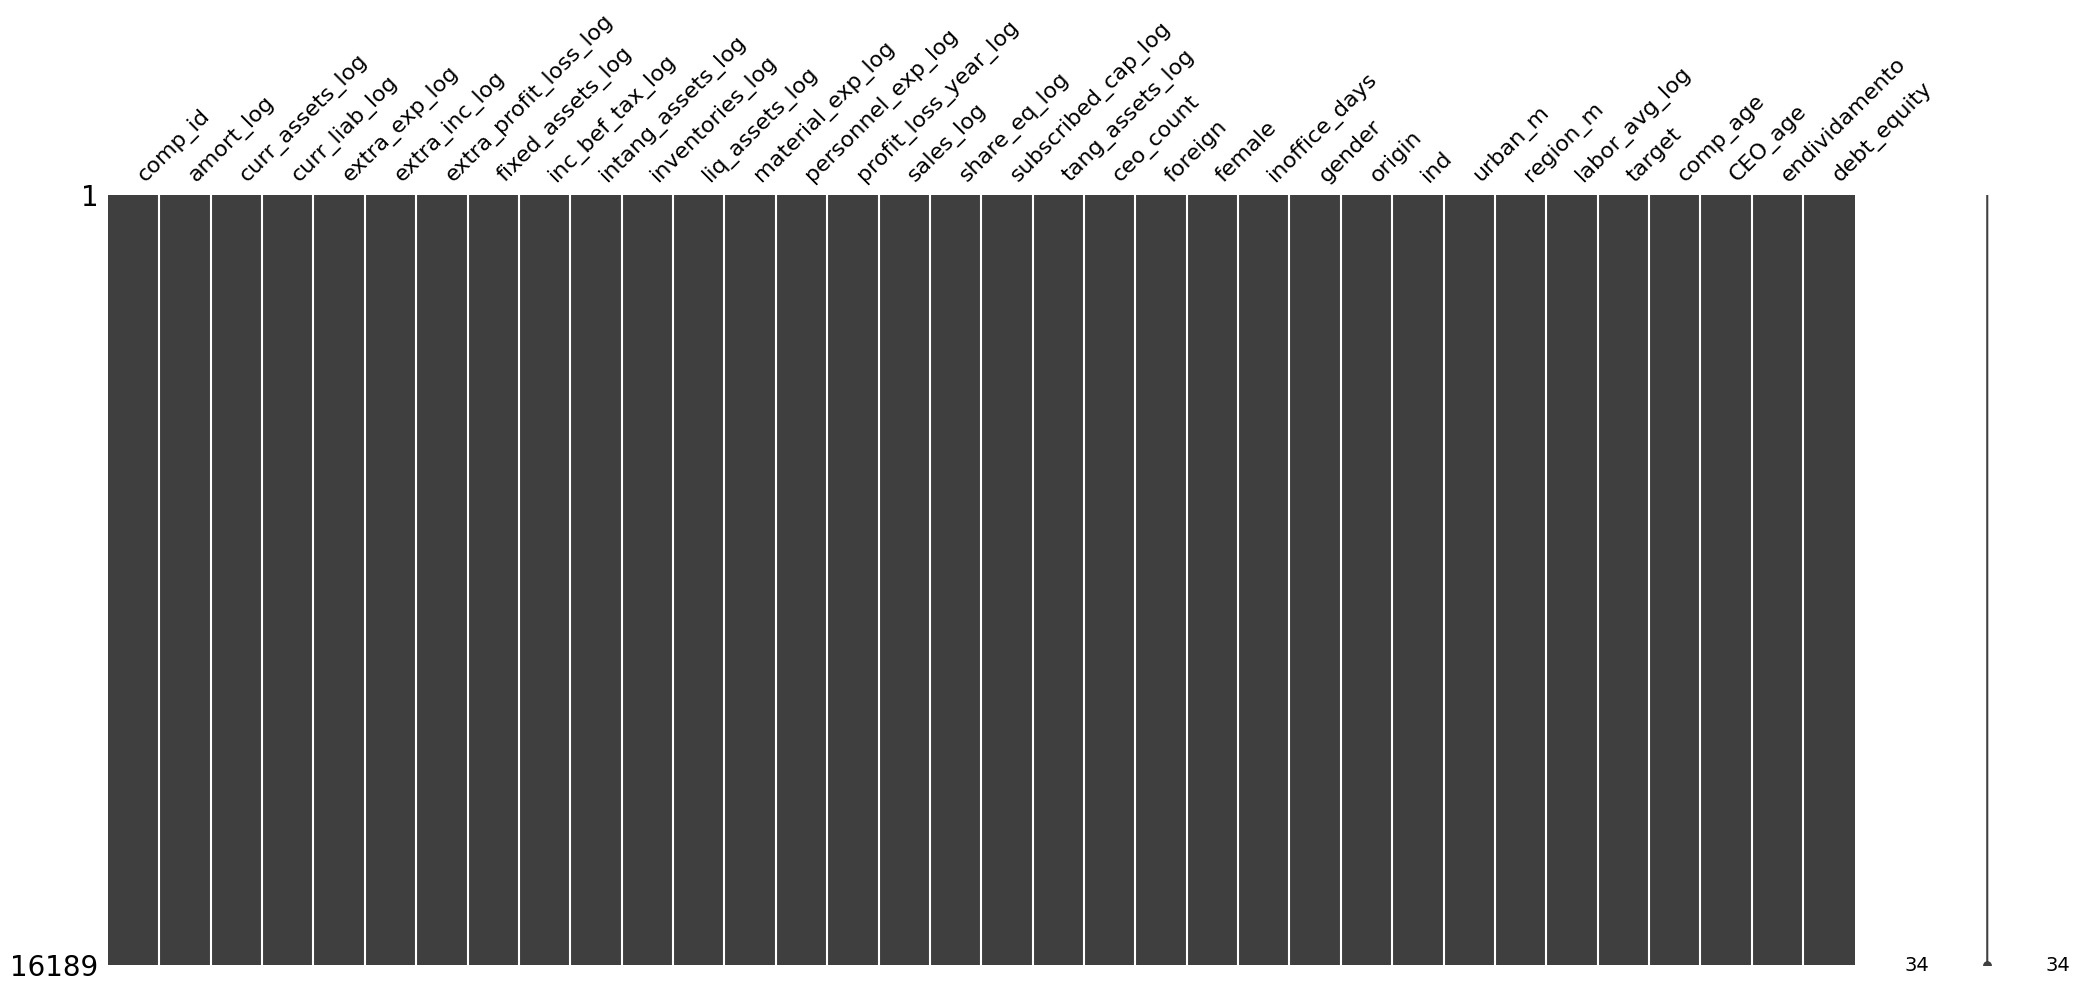

In [78]:
msno.matrix(df_final)

In [79]:
# Ajustando coluna target para o final
df_final = df_final[['comp_id', 'amort_log', 'curr_assets_log', 'curr_liab_log',
       'extra_exp_log', 'extra_inc_log', 'extra_profit_loss_log',
       'fixed_assets_log', 'inc_bef_tax_log', 'intang_assets_log',
       'inventories_log', 'liq_assets_log', 'material_exp_log',
       'personnel_exp_log', 'profit_loss_year_log', 'sales_log',
       'share_eq_log', 'subscribed_cap_log', 'tang_assets_log', 'ceo_count',
       'foreign', 'female', 'inoffice_days', 'gender', 'origin', 'ind',
       'urban_m', 'region_m', 'labor_avg_log', 'comp_age',
        'CEO_age', 'endividamento', 'debt_equity', 'target']]

df_final


,comp_id,amort_log,curr_assets_log,curr_liab_log,extra_exp_log,extra_inc_log,extra_profit_loss_log,fixed_assets_log,inc_bef_tax_log,intang_assets_log,inventories_log,liq_assets_log,material_exp_log,personnel_exp_log,profit_loss_year_log,sales_log,share_eq_log,subscribed_cap_log,tang_assets_log,ceo_count,foreign,female,inoffice_days,gender,origin,ind,urban_m,region_m,labor_avg_log,comp_age,CEO_age,endividamento,debt_equity,target
23,1002029.00,9.61,12.23,11.70,0.00,0.00,0.00,10.06,9.38,0.00,6.52,9.62,13.80,10.62,9.18,13.94,11.44,9.32,10.06,2.00,0.00,0.00,3101.00,male,Domestic,2.00,3,East,-0.78,6.00,37.00,0.53,1.16,0.00
56,1011889.00,10.51,11.98,9.85,0.00,0.00,0.00,13.75,11.48,7.34,9.38,11.79,12.23,11.44,11.48,12.98,13.88,9.77,13.75,1.00,0.00,0.00,6198.00,male,Domestic,3.00,2,West,0.48,20.00,66.00,0.02,0.02,0.00
68,1014183.00,9.44,12.21,9.02,0.00,2.00,2.00,11.68,-7.27,0.00,0.00,9.83,11.11,10.93,-7.76,11.77,12.64,9.32,11.68,1.00,0.00,0.00,3594.00,male,Domestic,3.00,2,Central,-0.34,11.00,66.00,0.03,0.03,0.00
80,1018301.00,0.00,7.50,6.38,0.00,2.41,2.41,10.86,-7.00,4.78,6.21,7.18,8.11,8.13,-7.01,8.81,9.29,9.32,10.86,2.00,0.00,0.50,1246.50,mix,Domestic,3.00,2,Central,-1.88,8.00,50.50,0.01,0.03,0.00
91,1022796.00,6.54,8.73,8.82,0.00,0.00,0.00,8.54,-7.14,0.00,6.32,8.05,9.78,9.00,-7.18,10.17,8.22,8.22,8.54,1.00,0.00,0.00,5201.00,male,Domestic,3.00,1,Central,-2.48,11.00,43.00,0.60,0.92,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287764,463885369344.00,6.30,9.57,9.50,0.00,0.00,0.00,8.99,7.76,0.00,0.00,9.53,11.89,9.18,7.76,11.96,8.79,7.52,8.99,1.00,0.00,0.00,2615.00,male,Domestic,4.00,3,East,-2.11,3.00,34.00,0.59,1.58,0.00
287779,463981969408.00,9.70,10.35,9.02,0.00,0.00,0.00,11.64,-10.84,0.00,0.00,8.74,12.00,10.97,-10.85,12.16,11.82,9.32,11.64,1.00,0.00,0.00,7902.00,male,Domestic,2.00,1,Central,-0.60,17.00,55.00,0.06,0.06,0.00
287790,464021159936.00,8.18,10.36,9.79,0.00,0.00,0.00,10.36,6.14,0.00,9.31,7.05,10.34,7.90,5.56,10.55,10.72,9.32,10.36,1.00,0.00,0.00,1221.00,male,Domestic,2.00,2,Central,-2.48,6.00,46.00,0.28,0.32,0.00
287798,464044589056.00,11.24,15.38,14.08,0.00,0.00,0.00,12.56,13.76,0.00,13.59,11.89,15.61,14.06,11.91,15.96,13.36,11.44,12.56,1.00,1.00,0.00,2943.00,male,Foreign,2.00,3,Central,0.61,4.00,62.00,0.26,1.79,0.00


In [80]:
# Salvando arquivo final em csv

df_final.to_csv("df_final.csv")

In [81]:
df_final['target'].value_counts()

0.00    13863
1.00     2326
Name: target, dtype: int64

In [82]:
df_final[df_final['comp_id'] == 2007586]

,comp_id,amort_log,curr_assets_log,curr_liab_log,extra_exp_log,extra_inc_log,extra_profit_loss_log,fixed_assets_log,inc_bef_tax_log,intang_assets_log,inventories_log,liq_assets_log,material_exp_log,personnel_exp_log,profit_loss_year_log,sales_log,share_eq_log,subscribed_cap_log,tang_assets_log,ceo_count,foreign,female,inoffice_days,gender,origin,ind,urban_m,region_m,labor_avg_log,comp_age,CEO_age,endividamento,debt_equity,target
412,2007586.00,0.00,8.06,6.57,0.00,0.00,0.00,0.00,7.93,0.00,7.57,7.10,8.55,8.58,7.86,9.53,7.81,5.22,0.00,1.00,0.00,1.00,6359.00,female,Domestic,3.00,3,East,-2.48,13.00,48.00,0.22,0.27,1.00


In [83]:
df_bisnode.loc[df_bisnode['comp_id'] == 2007586, ['comp_id', 'year', 'sales','target']]

,comp_id,year,sales,target
405,2007586.00,2005,1322.22,0.00
406,2007586.00,2006,4392.59,0.00
407,2007586.00,2007,5048.15,0.00
408,2007586.00,2008,8281.48,0.00
409,2007586.00,2009,9755.56,0.00
410,2007586.00,2010,8966.67,0.00
411,2007586.00,2011,11766.67,0.00
412,2007586.00,2012,13807.41,1.00
413,2007586.00,2013,17007.41,0.00
